# COGS 108 - EDA Checkpoint

# Names
- Jerrick Lee
- Dong Pham
- Fernando Lares
- Ron Lai
- Alexander Huynh

<a id='research_question'></a>
# Research Question

Is there a relationship between a steam game being watched on a streaming platform and the and the game's number of players? We will focus on Twitch.tv as our streaming platform to gather data on the average viewers per month of games, and we will use the video game distribution service, Steam, to gather data on the average number of player of games being played on steam per month.

# Dataset(s)

- Dataset Name: Twitch_game_data.csv
- Link to the dataset: https://www.kaggle.com/rankirsh/evolution-of-top-games-on-twitch
- Number of observations: 14400
<br>This dataset has Twitch metrics sorted by year and month. We will be focusing specifically on each game's Hour_watched, Avg_viewer_ratio, Peak_viewers, and Avg_viewers.<br><br>

- Dataset Name: Valve_Player_Data.csv
- Link to the dataset: https://www.kaggle.com/jackogozaly/steam-player-data?select=Valve_Player_Data.csv
- Number of observations: 5271
<br>This dataset has Steam metrics sorted by year and month. We will be focusing specifically on each game's Avg_players as well as Peak_Players.

<b>How we plan to combine these datasets</b><br>

We plan to combine both datasets through the dates (month and year) as well as the game being played. This way we will have one set that tells us the average viewer of the game on twitch.tv in a given month-year as well as the average number of players of the game on steam in the same month-year.

# Setup

In the following cell, we will import a variety of libraries that will aid us in this project. We will import these libraries using their typical shortnames. <br> 

The pandas libraries will be paramountly valuable in helping us wrangle our data, which are currently primarily in the form of .csv files. The `pandas` library allows us to read in and to store our raw datasets, which will be from .csv file, into dataframes which will then enable us to clean, reorganize, and manipulate our data. Ultimately, our goal is to combine them into one dataset, and we will be using this finalized dataset to explore the relationship of interest which is between game's average viewers per month on Twitch and the game's average number of players on steam in the same corresponding month. <br>

The `numpy` library will be helpful as it contains multi-dimensional array and matrix data structures. In case we need to store our data in an array or matrix, we can use functions that can carry mathematical and statistical operations on arrays. <br>
We will use `seaborn` and `matploylib.pyplot` libraries to generate data visualizations and statistical graphics such line plots which are essentially for depicting linear relationship and linear regression.<br>

In [1]:
## YOUR CODE HERE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning

**Describe your data cleaning steps here:**<br>

To start, we will first read in the .csv file called **'Twitch_game_data.csv'** and initially assign it to the variable **Twitch**. This file contains our first dataset of Twitch.tv streaming metrics. This file contains many variables of interest such as the name of game that was being streamed, which year and month the observation occured, and important details such as the average number of viewer for that particular game in a month of a year. We will first call `head()` so we can grasp the basic layout of the dataframe. Afterwards we call will **Twitch.columns** to display a list of all the column variables get a sense of the types of variables this dataset has.  

In [2]:
Twitch = pd.read_csv('Twitch_game_data.csv', encoding='cp1252')
Twitch.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03


In [3]:
Twitch.columns

Index(['Rank', 'Game', 'Month', 'Year', 'Hours_watched', 'Hours_Streamed',
       'Peak_viewers', 'Peak_channels', 'Streamers', 'Avg_viewers',
       'Avg_channels', 'Avg_viewer_ratio'],
      dtype='object')

Next, to get an brief overview of how large this dataset is, we can invoke Twitch.describe

In [4]:
Twitch.describe

<bound method NDFrame.describe of        Rank                              Game  Month  Year  Hours_watched  \
0         1                 League of Legends      1  2016       94377226   
1         2  Counter-Strike: Global Offensive      1  2016       47832863   
2         3                            Dota 2      1  2016       45185893   
3         4                       Hearthstone      1  2016       39936159   
4         5       Call of Duty: Black Ops III      1  2016       16153057   
...     ...                               ...    ...   ...            ...   
14395   196                       Garry's Mod     12  2021         630902   
14396   197  Call of Duty: Black Ops Cold War     12  2021         622497   
14397   198                             Noita     12  2021         620983   
14398   199                 Pro Soccer Online     12  2021         619859   
14399   200       Pok<U+00E9>mon Sword/Shield     12  2021         615725   

      Hours_Streamed  Peak_viewers  Peak_

From invoking .describe, we see that we have quite a large set of data as there are about 14400 observations and 12 different variables for each observation.<br>

Looking at these varaibles, this dataset provides pretty standard variables regarding the idea of streaming platforms. As our research question concerns around the average viewers of a game in a month and year, there are some variables like 'Rank' and 'Streamers' that may not apply to the focus of our study. <br>

To begin cleaning the twitch data, we will create a new data table and only use variables that are important or necessary to our study, and we will store this new dataframe in a varaible called **avg_viewers**. Then as a sanity check, we will call **avg_viewers.head()** just to get a sense that our new dataframe contains the columns variables we want. 

In [5]:
avg_viewers = Twitch[['Year', 'Month', 'Hours_watched', 'Avg_viewer_ratio', 'Peak_viewers', 'Avg_viewers', 'Game']]

In [6]:
avg_viewers.head(50)

,Year,Month,Hours_watched,Avg_viewer_ratio,Peak_viewers,Avg_viewers,Game
0,2016,1,94377226,69.29,530270,127021,League of Legends
1,2016,1,47832863,57.62,372654,64378,Counter-Strike: Global Offensive
2,2016,1,45185893,104.26,315083,60815,Dota 2
3,2016,1,39936159,169.29,131357,53749,Hearthstone
4,2016,1,16153057,14.03,71639,21740,Call of Duty: Black Ops III
5,2016,1,10231056,20.88,64432,13769,Minecraft
6,2016,1,8771452,25.57,46130,11805,World of Warcraft
7,2016,1,7894571,38.40,41588,10625,Z1: Battle Royale
8,2016,1,7688369,144.42,84051,10347,Talk Shows & Podcasts
9,2016,1,6988475,34.32,145728,9405,FIFA 16


The next data cleaning task we want to handle is to remove null values that are invalid such as blank input or NaN variables. As some games, to name a few: League of Legends, Apex Legends, Grand Theft Auto V, and Counter-Strike: Global Offensive, are famously known to consistently top twitch.tv charts, we want to make sure that we do not just blatently remove observations as that could result in remove a significant observation. Therefore, we will first run the following line of code: `avg_viewers[avg_viewers.isnull().any(axis=1)]`. This will return a dataframe containing any observation or row that has at least one column element that contains a null value. By doing this, we can take a look at the observation before deciding to remove it from the dataframe.

In [7]:
avg_viewers[avg_viewers.isnull().any(axis=1)]

,Year,Month,Hours_watched,Avg_viewer_ratio,Peak_viewers,Avg_viewers,Game
7561,2019,2,317951,4.13,30919,473,NaN


As we ran the code, we luckily only see that there is one observation that has a null value. As the null value is the name of the Game, we can simply just remove it as it would be of no use in our study. To remove this value, we will just the `dropna()` method.

In [8]:
avg_viewers = avg_viewers.dropna(subset=['Game'])

Then we can quickly just call the .shape function to make sure we have the correct number of rows which should now be 14399 as we had only removed 1 row from **avg_viewers**.

In [9]:
avg_viewers.shape

(14399, 7)

The next .csv file we read in is **'Valve_Player_Data.csv'** and store this in a variable called **Players**. This is the second vital dataset that we will use for our study. This dataset contains information regarding player metrics of Steam games such as "Avg_players" which details the average number of players for the game. The observations take place every "Month_Year" which is important as we will use this variable to relate the data from **Value_Player_Data.csv** to our Twitch dataset stored in **avg_viewers**.<br>

Before cleaning, we will first invoke `head()` to survey the lay of the dataset, then we can call `.columns` on the dataset to get an overview of the variables contained in this dataset.

In [10]:
player = pd.read_csv('Valve_Player_Data.csv')
player.head()

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
0,September 2021,512350.92,268.96,+0.05%,942519,https://steamcharts.com/app/730,2021-09-01,Counter Strike: Global Offensive
1,August 2021,512081.96,6014.60,+1.19%,802544,https://steamcharts.com/app/730,2021-08-01,Counter Strike: Global Offensive
2,July 2021,506067.36,-43279.72,-7.88%,763523,https://steamcharts.com/app/730,2021-07-01,Counter Strike: Global Offensive
3,June 2021,549347.08,-110541.81,-16.75%,929940,https://steamcharts.com/app/730,2021-06-01,Counter Strike: Global Offensive
4,May 2021,659888.89,-63457.63,-8.77%,1087197,https://steamcharts.com/app/730,2021-05-01,Counter Strike: Global Offensive


In [11]:
player.columns

Index(['Month_Year', 'Avg_players', 'Gain', 'Percent_Gain', 'Peak_Players',
       'URL', 'Date', 'Game_Name'],
      dtype='object')

The variables: 'Gain', 'Percent_Gain', and 'URL' are not applicable to our study. We can remove these variables by creating a new dataframe, which we call **avg_playerCounts**, and specify the variables we would like to keep. From the list of variables above, 'Game_Name', 'Month_Year', and 'Avg_players'are the variables that we believe are the most important as 'Avg_players' is the variable of interest in the relationship we seeking to establish. 'Month_Year' and 'Game_Name' will be necessary for joining two datasets together.

In [12]:
avg_playerCounts = player[['Month_Year', 'Avg_players', 'Peak_Players', 'Game_Name']]
avg_playerCounts = avg_playerCounts.rename({'Game_Name' : 'Game'}, axis='columns')

For a quick sanity check to make sure we have the correct dataframe, we will call `avg_playerCounts.head()`

In [13]:
avg_playerCounts.head(50)

,Month_Year,Avg_players,Peak_Players,Game
0,September 2021,512350.92,942519,Counter Strike: Global Offensive
1,August 2021,512081.96,802544,Counter Strike: Global Offensive
2,July 2021,506067.36,763523,Counter Strike: Global Offensive
3,June 2021,549347.08,929940,Counter Strike: Global Offensive
4,May 2021,659888.89,1087197,Counter Strike: Global Offensive
5,April 2021,723346.52,1148077,Counter Strike: Global Offensive
6,March 2021,740927.82,1198581,Counter Strike: Global Offensive
7,February 2021,741013.24,1123485,Counter Strike: Global Offensive
8,January 2021,743209.66,1124553,Counter Strike: Global Offensive
9,December 2020,717803.75,1164396,Counter Strike: Global Offensive


Now that we have a dataframe with only the necessary variables, we want to clean out null values like we did in the avg_viewers data. We will first look at all the rows that have a null oberservation. 

In [14]:
avg_playerCounts[avg_playerCounts.isnull().any(axis=1)]

,Month_Year,Avg_players,Peak_Players,Game


The line of code we ran returned an empty data frame which luckily means our avg_playerCounts data does not contain any null values. 

At this point of the data cleaning process, both data tables: **avg_viewers** and **avg_playerCounts** are relatively clean in that they contain no null values and we pruned excess variables. We would now commence the process of merging the two datasets. The first task at hand is to address the **'Game'** variable. For our study, we want to relate games being viewed on twitch.tv, by taking the average viewers per month, to the same corresponding game being played on steam, by taking the average players per month. Thus, all the game observations in our dataset must be found in both the **avg_viewers** and **avg_playerCounts**. To start we will first call the `unique()` function on the **'Game'** column of both datasets to gauge the number of unique games contained in each dataset.

In [15]:
print(len(avg_viewers['Game'].unique()))
print(len(avg_playerCounts['Game'].unique()))

1799
98


From running the `.unique()` on both the **'Game'** column of the dataset, there appears to be a stark contrast in the number of unique games in each dataset as **avg_viewers** contains approximately 18 times more the number of games that avg_playerCounts contains. <br>

The solution we will take to ensure that our datasets will only have games that are found in both datasets is to first create an empty list, then use a for loop to traverse thru both lists and append each unique games from the **'Game'** column of each dataset. Then we can invoke the `unique()` function on the new, combined unique game list. We can label this list **combined_unique_games**.

In [16]:
combined_unique_games = []
avg_viewers_unique_games = avg_viewers['Game'].unique()
avg_playerCounts_unique_games = avg_playerCounts['Game'].unique()

for game in avg_viewers_unique_games:
    strGame = game.strip()
    if strGame not in combined_unique_games:
        combined_unique_games.append(strGame)

for game in avg_playerCounts_unique_games:
    strGame = game.strip()
    if strGame not in combined_unique_games:
        combined_unique_games.append(strGame)

We now should have a combined list of unique games from both the **avg_viewers** dataset and the **avg_playerCounts** dataset. This dataset should have no duplicates, however, for quality assurance, we can alphanumerically sort the list, print each element with a newline character, and manually scroll through the list to verify ourselves.

In [17]:
combined_unique_games.sort()
print(len(combined_unique_games))
print (*combined_unique_games, sep = '\n')

1823
.hack//G.U. Last Recode
60 Parsecs!
60 Seconds!
7 Days to Die
<U+014C>kami
A Dance of Fire and Ice
A Hat in Time
A Plague Tale: Innocence
A Total War Saga: Troy
A Way Out
ABZ<U+00DB>
AI: The Somnium Files
ALTF4
ANIME STANDING
APB Reloaded
ARAYA
ARK: Survival Evolved
ARK: Survival Of The Fittest
ARMS
ASMR
ASTRONEER
Abandon Ship
Absolver
Ace Combat 7: Skies Unknown
Agar.io
Age of Darkness: Final Stand
Age of Empires
Age of Empires II
Age of Empires II: Definitive Edition
Age of Empires II: HD Edition
Age of Empires IV
Age of Empires: Definitive Edition
Age of Wonders: Planetfall
Agents of Mayhem
Agony
Agrou
Aim Gods
Aion
Alan Wake Remastered
Albion Online
Alien: Isolation
Aliens: Fireteam Elite
Always On
American Truck Simulator
Amnesia: Rebirth
Amnesia: The Dark Descent
Among Us
Ancestors: The Humankind Odyssey
Angvik
Animal Crossing: New Horizons
Animal Crossing: New Leaf
Animals, Aquariums, and Zoos
Anime
Anime Land
Anno 1800
Anthem
Ape Escape
Apex Legends
Arcane
Arcanum: Of Stea

While we could have simply just extracted a unique list from the steam player dataset, **average_playerCounts**, we risk the scenario of having duplicates in which **'Game'** names can differ by a hyphen, comma, or extra space. By scrolling through this list, we can verify that there are no duplicate values in terms of exact strings. While there are cases of games having similar titles such as: **'Diablo II'**, **'Diablo II: Lord of Destruction'**, **'Diablo II: Ressurrected'**, we allow this case because these games are expansions, or in other words a continuation of the game such a sequel. <br>

However, we do run into the issue that we have the following values in the list: **'Counter Strike: Global Offensive'**, **'Counter-Strike'**, and **'Counter-Strike: Global Offensive'**. Which is, by a quick google search, considered a violation because they all refer to the same game and are not sequel, nor prequels of each other. <br>

While there may be another more efficient approach, we will take the naive approach of looking for each duplicate (as our list of unique games only contains approximately 1000 elements which is not much), perform manual google searches to determine if the game has relationship to each other, or is simply just a duplicate, and we will take note of all the duplicates and define a cleaning function based on these values.

In [18]:
# This following block creates a list that stores duplicate violations. This section is sort of a note section for our 
# reference in implementing a function.
duplicate_game_names = list()
duplicate_game_indices = list()

duplicate_game_names.append('Counter Strike: Global Offensive')
duplicate_game_names.append('Counter-Strike')
duplicate_game_names.append('Counter-Strike: Global Offensive')
duplicate_game_names.append('Divinity: Original Sin 2')
duplicate_game_names.append('Divinity: Original Sin II')
duplicate_game_names.append('Escape From Tarkov')
duplicate_game_names.append('Escape from Tarkov')
duplicate_game_names.append('NieR Replicant Ver.1.22474487139...')
duplicate_game_names.append('NieR Replicant ver.1.22474487139...')
duplicate_game_names.append('Tom Clancy\'s Rainbow Six Seige')
duplicate_game_names.append('Tom Clancy\'s Rainbow Six Siege')
duplicate_game_names.append('Total War: WARHAMMER II')
duplicate_game_names.append('Total War: Warhammer II')
duplicate_game_names.append('Who Wants To Be A Millionaire')
duplicate_game_names.append('Who Wants to Be a Millionaire')

for dup_game in duplicate_game_names:
    duplicate_game_indices.append(combined_unique_games.index(dup_game))
    
duplicate_game_index_pairs = zip(duplicate_game_names, duplicate_game_indices)
print(*duplicate_game_index_pairs, sep = '\n')

('Counter Strike: Global Offensive', 253)
('Counter-Strike', 254)
('Counter-Strike: Global Offensive', 255)
('Divinity: Original Sin 2', 374)
('Divinity: Original Sin II', 375)
('Escape From Tarkov', 440)
('Escape from Tarkov', 442)
('NieR Replicant Ver.1.22474487139...', 1027)
('NieR Replicant ver.1.22474487139...', 1028)
("Tom Clancy's Rainbow Six Seige", 1635)
("Tom Clancy's Rainbow Six Siege", 1636)
('Total War: WARHAMMER II', 1648)
('Total War: Warhammer II', 1650)
('Who Wants To Be A Millionaire', 1757)
('Who Wants to Be a Millionaire', 1758)


From an exhaustive manual search, the following list above contains pairs of the unallowed permutation of game names and their corresponding index. This list will be helpful in defining our function, in the next cell, which will help further refine the datasets to ensure the games are consistent. For chosing which string version of the game to use, we will use the version that is lited from the game's original publisher. 

In [19]:
def standardize_game(game): 
    game = game.strip()
    if game == 'Counter Strike: Global Offensive':
        game = game.replace('Counter Strike: Global Offensive', 'Counter-Strike: Global Offensive')
    elif game == 'Counter-Strike':
        game = game.replace('Counter-Strike', 'Counter-Strike: Global Offensive')
    elif game == 'Divinity: Original Sin 2':
        game = game.replace('Divinity: Original Sin 2', 'Divinity: Original Sin II')
    elif game == 'Escape From Tarkov':
        game = game.replace('Escape From Tarkov', 'Escape from Tarkov')
    elif game == 'NieR Replicant Ver.1.22474487139...':
        game = game.replace('NieR Replicant Ver.1.22474487139...', 'NieR Replicant ver.1.22474487139...')
    elif game == 'Tom Clancy\'s Rainbow Six Seige':
        game = game.replace('Tom Clancy\'s Rainbow Six Seige', 'Tom Clancy\'s Rainbow Six Siege')
    elif game == 'Total War: WARHAMMER II':
        game = game.replace('Total War: WARHAMMER II', 'Total War: Warhammer II')
    elif game == 'Who Wants to Be a Millionaire':
        game = game.replace('Who Wants to Be a Millionaire', 'Who Wants To Be A Millionaire')
        
    return game

To fix the issue of duplicate game names in **combined_unique_names**, we will first need to wrap the list in a pandas dataframe so we can use the `apply()` function, we will call this dataframe **game_df**. Next we want to rename the column to 'Game' to be consistent and finally apply the `standardize_game()` on the **'Game'** column of **game_df**. `standarize_game()` will turn each invalid game name to the correct game name, using the name listed by game's publisher as our benchmark. We then want to invoke `.drop_duplicates()` on the dataframe to eliminate any duplicated, correct game names. Based on our notes above, there are 8 duplicate values to remove. To keep track of this, we will print the length of the **'Game'** column before removing the values and call the length function again afterwards.

In [20]:
game_df = pd.DataFrame(combined_unique_games)
print("Total observations in game_df before dropping null observations: ", len(game_df))
game_df.columns = ['Game']
game_df['Game'] = game_df['Game'].apply(standardize_game)
game_df['Game'] = game_df['Game'].drop_duplicates()
# game_df = game_df.replace('', np.nan, regex=True)
# game_df = game_df.dropna(subset=['Game'])
print("Total observations in game_df before dropping null observations: ", len(game_df))

Total observations in game_df before dropping null observations:  1823
Total observations in game_df before dropping null observations:  1823


For further confirmation we can print the column as a list and manually check that the duplicate values no longer exist. 

In [21]:
print (*game_df['Game'], sep = '\n')

.hack//G.U. Last Recode
60 Parsecs!
60 Seconds!
7 Days to Die
<U+014C>kami
A Dance of Fire and Ice
A Hat in Time
A Plague Tale: Innocence
A Total War Saga: Troy
A Way Out
ABZ<U+00DB>
AI: The Somnium Files
ALTF4
ANIME STANDING
APB Reloaded
ARAYA
ARK: Survival Evolved
ARK: Survival Of The Fittest
ARMS
ASMR
ASTRONEER
Abandon Ship
Absolver
Ace Combat 7: Skies Unknown
Agar.io
Age of Darkness: Final Stand
Age of Empires
Age of Empires II
Age of Empires II: Definitive Edition
Age of Empires II: HD Edition
Age of Empires IV
Age of Empires: Definitive Edition
Age of Wonders: Planetfall
Agents of Mayhem
Agony
Agrou
Aim Gods
Aion
Alan Wake Remastered
Albion Online
Alien: Isolation
Aliens: Fireteam Elite
Always On
American Truck Simulator
Amnesia: Rebirth
Amnesia: The Dark Descent
Among Us
Ancestors: The Humankind Odyssey
Angvik
Animal Crossing: New Horizons
Animal Crossing: New Leaf
Animals, Aquariums, and Zoos
Anime
Anime Land
Anno 1800
Anthem
Ape Escape
Apex Legends
Arcane
Arcanum: Of Steamwork

With this information, it is time to refine the **'Game'** columns in both our **avg_viewers** and **avg_playerCounts** datasets. Using a similar approach of the procedure applied to the **combined_unique_games** list, we will first apply `standardize_game()` to both the dataset's **'Game'** column, this will standardize the game names across both datasets. <br>

The next part is a bit more complicated to carry out. We can only relate the data between the two datasets if they contain the same game. While steam, is a massive game distribution platform, it does not contain every single game that is being streamed on twitch.tv. And the same applies in the other direction, not all games streamed on twitch.tv can be found in steam. Therefore, this puts a constraint on our data. <br>

To ensure that our datasets only contains games that exist within both datasets, after standardizing the game, we will first make a unique list of games contained in **avg_playerCounts**, as it contains the smaller unique games between both datasets, and we will assign it to a previously defined variable **avg_playerCounts_unique_games**. We will then create a column, **avg_viewers['Contains_Game']**, containing boolean values in avg_viewers that will have a value of true or false if the current observation's game exists within **avg_playerCounts_unique_games**, this will be accomplished with the aid of the `isin()` function. With the next line of code `.replace(False, np.nan, regex=True)` will replace any False boolean value with a null value. Lastly we will drop any rows with null values, this essentially drops any rows with games in the **avg_viewers** dataframe that are not also present in **avg_playerCounts**. We can then generate a list of unique games in our newly pruned **avg_viewers** dataset, stored in **avg_viewers_unique_games** and carry out the same operation on the **avg_playerCounts** datasets. Lastly, we can drop the **'Contains_Game'** column from both datasets, as it will no longer be of use.

Performing this complicated cleaning task now satisfies the condition that all the unique games in our datasets are games that are only found in Steam, and all the unique games must exist in both datasets. 

In [22]:
# valid_game_list = game_df['Game'].tolist()
avg_viewers['Game'] = avg_viewers['Game'].apply(standardize_game)
avg_playerCounts['Game'] = avg_playerCounts['Game'].apply(standardize_game)

avg_playerCounts_unique_games = avg_playerCounts['Game'].unique()

avg_viewers['Contains_Game'] = avg_viewers['Game'].isin(avg_playerCounts_unique_games)
avg_viewers = avg_viewers.replace(False, np.nan, regex=True)
avg_viewers = avg_viewers.dropna()

avg_viewers_unique_games = avg_viewers['Game'].unique()

avg_playerCounts['Contains_Game'] = avg_playerCounts['Game'].isin(avg_viewers_unique_games)
avg_playerCounts = avg_playerCounts.replace(False, np.nan, regex=True)
avg_playerCounts = avg_playerCounts.dropna()

avg_viewers = avg_viewers.drop(columns=['Contains_Game'])
avg_playerCounts = avg_playerCounts.drop(columns=['Contains_Game'])

To do a quick sanity check, we can regenerate the list of unique games from each newly pruned dataset through calling the `.unique()` function on each game column again, and perform a simple equality condition. We expect to see that every value returned should be True, indicating that the unique games exist in both lists. And we can print the list to see what game titles we now have in our datasets.

In [23]:
avg_playerCounts_unique_games = avg_playerCounts['Game'].unique()
avg_viewers_unique_games = avg_viewers['Game'].unique()
avg_playerCounts_unique_games.sort()
avg_viewers_unique_games.sort()
print(avg_viewers_unique_games == avg_playerCounts_unique_games)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


In [24]:
print(*avg_viewers_unique_games, sep = '\n')

7 Days to Die
ARK: Survival Evolved
Age of Empires II: Definitive Edition
Apex Legends
Arma 3
Battlefield 1
Battlefield V
Black Desert
Bless Unleashed
Bloons TD 6
Brawlhalla
Cities: Skylines
Conqueror's Blade
Counter-Strike: Global Offensive
Crusader Kings III
Cyberpunk 2077
Dead by Daylight
Destiny 2
Divinity: Original Sin II
Don't Starve Together
Dota 2
Dying Light
Dyson Sphere Program
Eternal Return
Euro Truck Simulator 2
Europa Universalis IV
FINAL FANTASY XIV Online
Factorio
Fall Guys: Ultimate Knockout
Fallout 4
Farming Simulator 19
Football Manager 2020
Football Manager 2021
Garry's Mod
Geometry Dash
Grand Theft Auto V
Hearts of Iron IV
Hunt: Showdown
Left 4 Dead 2
MIR4
Medieval Dynasty
Monster Hunter: World
Mount & Blade II: Bannerlord
NARAKA: BLADEPOINT
No Man's Sky
Oxygen Not Included
PAYDAY 2
Path of Exile
Phasmophobia
Red Dead Redemption 2
RimWorld
Rocket League
Rust
SCUM
Satisfactory
Sea of Thieves
Shadowverse
Sid Meier's Civilization V
Sid Meier's Civilization VI
Slay the

Based on this new list, we can see that the list of unique games has considerably shrunk in magnitude. <br>

The last refinement we need to do before we can combine our dataset is to standardize the months and years. To start, we will quickly assess how the values are stored in each dataset.

In [25]:
avg_viewers['Month'].value_counts()

12    246
11    236
2     230
9     230
4     227
3     226
5     224
6     224
10    224
8     222
1     217
7     213
Name: Month, dtype: int64

In [26]:
avg_viewers['Year'].value_counts()

2020    494
2018    490
2019    484
2021    471
2017    411
2016    369
Name: Year, dtype: int64

In [27]:
avg_playerCounts['Month_Year']

0       September 2021
1          August 2021
2            July 2021
3            June 2021
4             May 2021
             ...      
5266     December 2016
5267     November 2016
5268      October 2016
5269    September 2016
5270       August 2016
Name: Month_Year, Length: 4547, dtype: object

From the above, the data in **avg_viewers** separates the month and year values and store them as ints. **avg_playerCounts** stores the Month and Years together in a single column as strings. To be able to perform mathematical and statistical operations easier further along the road, we will choose to standardize our months and years by following the format they are stored in **avg_viewers**. Thus, we now need to separate the month and year in **avg_playerCounts**, convert the month strings to their corresponding numeric mapping (ex January = 1, February = 2, etc...) and convert both the trasnformed months and separated years into int data types. First, we notice that **'Month_Year'** in **avg_playerCounts** is separated by a space. Therefore, we can employ the `str.split()` function from the pandas library on the **'Month_Year'** using space as the delimiter. We will store these two split columns in **avg_playerCounts** as **'Month'** and **'Year"** to be consistent with **avg_viewers**.

In [28]:
avg_playerCounts[['Month', 'Year']] = avg_playerCounts['Month_Year'].str.split(' ', expand=True)

Next we will call `.head()` on **avg_playerCounts** to view the new dataframe.

In [29]:
avg_playerCounts.head(10)

,Month_Year,Avg_players,Peak_Players,Game,Month,Year
0,September 2021,512350.92,942519,Counter-Strike: Global Offensive,September,2021
1,August 2021,512081.96,802544,Counter-Strike: Global Offensive,August,2021
2,July 2021,506067.36,763523,Counter-Strike: Global Offensive,July,2021
3,June 2021,549347.08,929940,Counter-Strike: Global Offensive,June,2021
4,May 2021,659888.89,1087197,Counter-Strike: Global Offensive,May,2021
5,April 2021,723346.52,1148077,Counter-Strike: Global Offensive,April,2021
6,March 2021,740927.82,1198581,Counter-Strike: Global Offensive,March,2021
7,February 2021,741013.24,1123485,Counter-Strike: Global Offensive,February,2021
8,January 2021,743209.66,1124553,Counter-Strike: Global Offensive,January,2021
9,December 2020,717803.75,1164396,Counter-Strike: Global Offensive,December,2020


The next step in standardizing the months and years is to write a function that we can apply to every element in the newly formed **'Month'** column, transforming the string names to their numeric mapping as ints. 

In [30]:
def standardize_month(month):
    
    month = month.lower()
    month = month.strip()
    
    if 'jan' in month:
        month = 1
    elif 'feb' in month:
        month = 2
    elif 'mar' in month:
        month = 3
    elif 'apr' in month:
        month = 4
    elif 'may' in month:
        month = 5
    elif 'jun' in month:
        month = 6
    elif 'jul' in month:
        month = 7
    elif 'aug' in month:
        month = 8
    elif 'sep' in month:
        month = 9
    elif 'oct' in month:
        month = 10
    elif 'nov' in month:
        month = 11
    elif 'dec' in month:
        month = 12    

    try:
        return int(month)
    except:
        return np.nan

Now that we have our function to standardize the months, we will apply it **'Month'** in **avg_playerCounts**. We can also covert **'Year'** to ints by invoking the `.astype(int)` function on the column and. Then very quicly, let's call value_counts() on each column to check the values and the value data types.

In [31]:
avg_playerCounts['Month'] = avg_playerCounts['Month'].apply(standardize_month)
avg_playerCounts['Year'] = avg_playerCounts['Year'].astype(int)
avg_playerCounts['Month'].value_counts()

9     415
8     411
7     402
6     392
5     383
4     378
3     372
2     369
1     366
12    362
11    352
10    345
Name: Month, dtype: int64

In [32]:
avg_playerCounts['Year'].value_counts()

2020    776
2021    681
2019    662
2018    615
2017    568
2016    458
2015    334
2014    235
2013    165
2012     53
Name: Year, dtype: int64

Finally, as we have cleaned and standardized **'Game'**, **"Month'**, and **'Year'** in both our dataset, we can now merge them together to one dataset. This process is pretty simple now that we have cleaned our datasets and standardized our variables. To accomplish this task, we will use the `merge.()` function and set the parameter on to `on=['Game', 'Month', 'Year']` as these are the three columns that define how we want to the merging process to be based on. We will store the result of the merge dataFrame in the variable, **viewers_and_players**.

In [33]:
viewers_and_players = avg_viewers.merge(avg_playerCounts, on=['Game', 'Month', 'Year'])
viewers_and_players.head()

,Year,Month,Hours_watched,Avg_viewer_ratio,Peak_viewers,Avg_viewers,Game,Month_Year,Avg_players,Peak_Players
0,2016,1,47832863,57.62,372654,64378,Counter-Strike: Global Offensive,January 2016,365371.09,667432
1,2016,1,47832863,57.62,372654,64378,Counter-Strike: Global Offensive,January 2016,16643.29,29670
2,2016,1,45185893,104.26,315083,60815,Dota 2,January 2016,612174.78,1067949
3,2016,1,4866039,20.10,25742,6549,Tom Clancy's Rainbow Six Siege,January 2016,10244.29,20006
4,2016,1,4014296,9.86,32724,5402,Grand Theft Auto V,January 2016,46993.33,93726


Although we are fortunate that the datasets we found for our study both encompass the same range of years, from 2016 to 2021, we cannot guarantee that the datasets would map perfectly 1 to 1 for each Game in a given month and year Therefore, we can call `df[df.isnull().any(axis=1)]` and to get a dataFrame that details which rows are empty, we will store the retuned dataFrame in the variable, **rowsToDrop**. `.isnull()` returns a dataframe with every cell having a boolean value of True or False to indicate if there is a null element. Storing this as df[df.isnull().any(axis=1)] will return a dataframe with the actual rows missing. The parameter `(axis=1)` will include the row if at least any 1 column element is null, meaning the row will be including if it contains a True value from `.isnull()`. 

In [34]:
rowsToDrop = viewers_and_players[viewers_and_players.isnull().any(axis=1)]
rowsToDrop

,Year,Month,Hours_watched,Avg_viewer_ratio,Peak_viewers,Avg_viewers,Game,Month_Year,Avg_players,Peak_Players


# Data Analysis & Results (EDA)

**Carry out EDA on your dataset(s); Describe in this section:**<br>

First, we can run a simple function on our **viewers_and_players** dataset to see if there is anything interesting about basic statistical calculation such as mean, standard deviation, and measuress of spread. 

In [35]:
viewers_and_players.groupby('Game').describe()

Year                                 \
                                      count         mean       std     min   
Game                                                                         
7 Days to Die                          69.0  2018.391304  1.673473  2016.0   
ARK: Survival Evolved                  63.0  2018.222222  1.549656  2016.0   
Age of Empires II: Definitive Edition  11.0  2019.818182  0.404520  2019.0   
Apex Legends                           11.0  2020.818182  0.404520  2020.0   
Arma 3                                 54.0  2017.796296  1.365058  2016.0   
...                                     ...          ...       ...     ...   
Valheim                                 6.0  2021.000000  0.000000  2021.0   
War Thunder                            37.0  2017.945946  1.855112  2016.0   
Warframe                               69.0  2018.391304  1.673473  2016.0   
World of Warships                      48.0  2019.250000  1.211646  2017.0   
Yu-Gi-Oh! Duel Links                   45.0  2019.355556  1.170772  2017.0   

                                                                      Month  \
                                          25%     50%     75%     max count   
Game                                                                          
7 Days to Die                          2017.0  2018.0  2020.0  2021.0  69.0   
ARK: Survival Evolved                  2017.0  2018.0  2019.5  2021.0  63.0   
Age of Empires II: Definitive Edition  2020.0  2020.0  2020.0  2020.0  11.0   
Apex Legends                           2021.0  2021.0  2021.0  2021.0  11.0   
Arma 3                                 2017.0  2018.0  2019.0  2021.0  54.0   
...                                       ...     ...     ...     ...   ...   
Valheim                                2021.0  2021.0  2021.0  2021.0   6.0   
War Thunder                            2016.0  2017.0  2020.0  2021.0  37.0   
Warframe                               2017.0  2018.0  2020.0  2021.0  69.0   
World of Warships                      2018.0  2019.0  2020.0  2021.0  48.0   
Yu-Gi-Oh! Duel Links                   2018.0  2019.0  2020.0  2021.0  45.0   

                                                 ...  Avg_players             \
                                           mean  ...          75%        max   
Game                                             ...                           
7 Days to Die                          6.304348  ...   16952.0600   25366.69   
ARK: Survival Evolved                  6.333333  ...   47261.6450   87738.70   
Age of Empires II: Definitive Edition  6.181818  ...   14186.9650   19202.51   
Apex Legends                           6.181818  ...  138043.9300  169528.17   
Arma 3                                 6.407407  ...   21478.0900   26972.14   
...                                         ...  ...          ...        ...   
Valheim                                4.833333  ...  151168.3350  210302.24   
War Thunder                            6.594595  ...   20321.0600   30023.21   
Warframe                               6.304348  ...   51614.7800   76594.91   
World of Warships                      6.500000  ...    7582.0475   11574.22   
Yu-Gi-Oh! Duel Links                   6.288889  ...    8630.4300   10532.88   

                                      Peak_Players                 \
                                             count           mean   
Game                                                                
7 Days to Die                                 69.0   22284.347826   
ARK: Survival Evolved                         63.0   74715.126984   
Age of Empires II: Definitive Edition         11.0   25041.363636   
Apex Legends                                  11.0  224168.636364   
Arma 3                                        54.0   35848.537037   
...                                            ...            ...   
Valheim                                        6.0  215255.166667   
War Thunder                 

`.descsribe()` does not seem to reveal much useful information of the dataset as a whole. As our dataframe contains many variables, there is some difficulty in viewing the table as we get some uncessary statistical calculations such as the mean of the year or max of the year. From a quick glance, we can make sense of some of the statistics intuiviely such as how we would expect a more popular game like **'Apex Legends'** to a higher number of average players than a lesser known game such as **'World of Warships'**.



We can call create a scatter matrix using pandas `pd.plotting.scatter_matrix(data)` to get a rough overview of how each variable would look when plotted against each other. We will store this scatter matrix in a varaible **fig**. Next, to get a better visualization, we will call some functions from the matplotlib.pyplot library such as `set_size_inches` to enlarge the graph, which is necessary as we have 8 different variables in **viewers_and_players**.

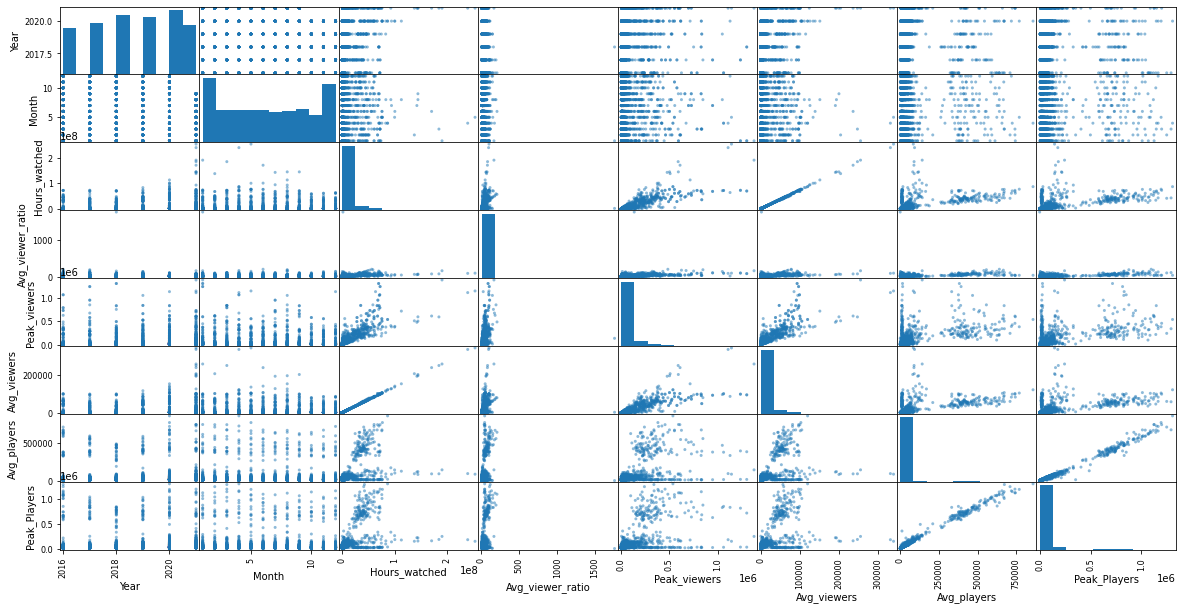

In [36]:
fig = pd.plotting.scatter_matrix(viewers_and_players)
fig = plt.gcf()
fig.set_size_inches(20, 10)

Iniatally what we can grasp from this scatter matrix is that there appears to bar plots, histograms, and scatterplots. Some of the scatter plots already display lines from a macroscopic view, especially positive linear lines, which can be interpreted as a good sign as our research question concerns the idea of relationship between variables. 

Next we would like to explore barplots. Because most of our data consists of averages, they are primarily in the form of floating-point values which are hard to plot on barplots. One variable we can plot using barplot is the **'Game'** variable which is helpful in giving us a sense of the number of observations we have for each game. To achieve this, we will use seaborn's library countplot `sns.countplot`. We can also use `sns.set` to change the size of our countplot as we have many different unique games. We will also be plotting the variable **'Game'** on the y-axis to improve readability. 

Text(0, 0.5, 'Game Name')

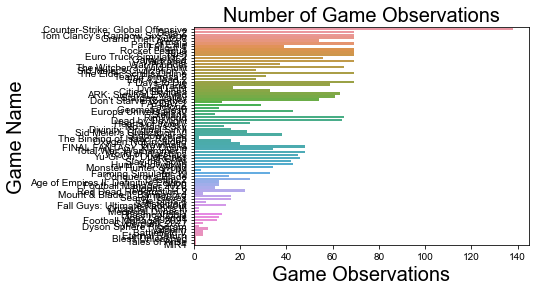

In [37]:
game_observations = sns.countplot(y = 'Game', data = viewers_and_players).set(title='Number of Game Observations')
sns.set(rc={'figure.figsize':(35,30)})
plt.title('Number of Game Observations', size = 20)
plt.xlabel('Game Observations', size = 20)
plt.ylabel('Game Name', size = 20)

#Note, may need to double click to get a better view of the countplot.

From the barplot above, this reveals to us that the number of observations seems to be unbalanced. We can vaguely estimate that the average number of observations for a game is roughly around the 40 to 50 count range. We notice some games near the bottom such as **'Tales of Arise'** have near zero observations. This may cause a hindrance when we try to perform linear regression as we need to satisfy certain conditions such has having a minimium number of observations. The more popular games seem to have a higher number of observation count. Lastly we notice that **'Counter-Strike: Global Offensive** has the the most number of observations falling slightly shortr of 140 counts. <br>

The plot of utmost interest in our study would be the scatterplot as our research question is trying to determine a relationship between the average number of twitch.tv viewers per month for a given game and the average number of players on steam to the same corresponding game. First to get raw outline of if there is a linear relationship, we will plot two scatter plots with variables **'Avg_viewers'** and **'Avg_players'**. We will achieve this using the seaborn library's `sns.scatterplot()` function. <br>

First, let's plot **'Avg_viewers'** on the x-axis (independent variable), and **'Avg_players'** on the y-axis (dependent variable) and see if there is any pattern bewtween the plotted points. Following our hypothesis, we would like to see something linear.

Text(0, 0.5, 'Average Number of Players Per Month')

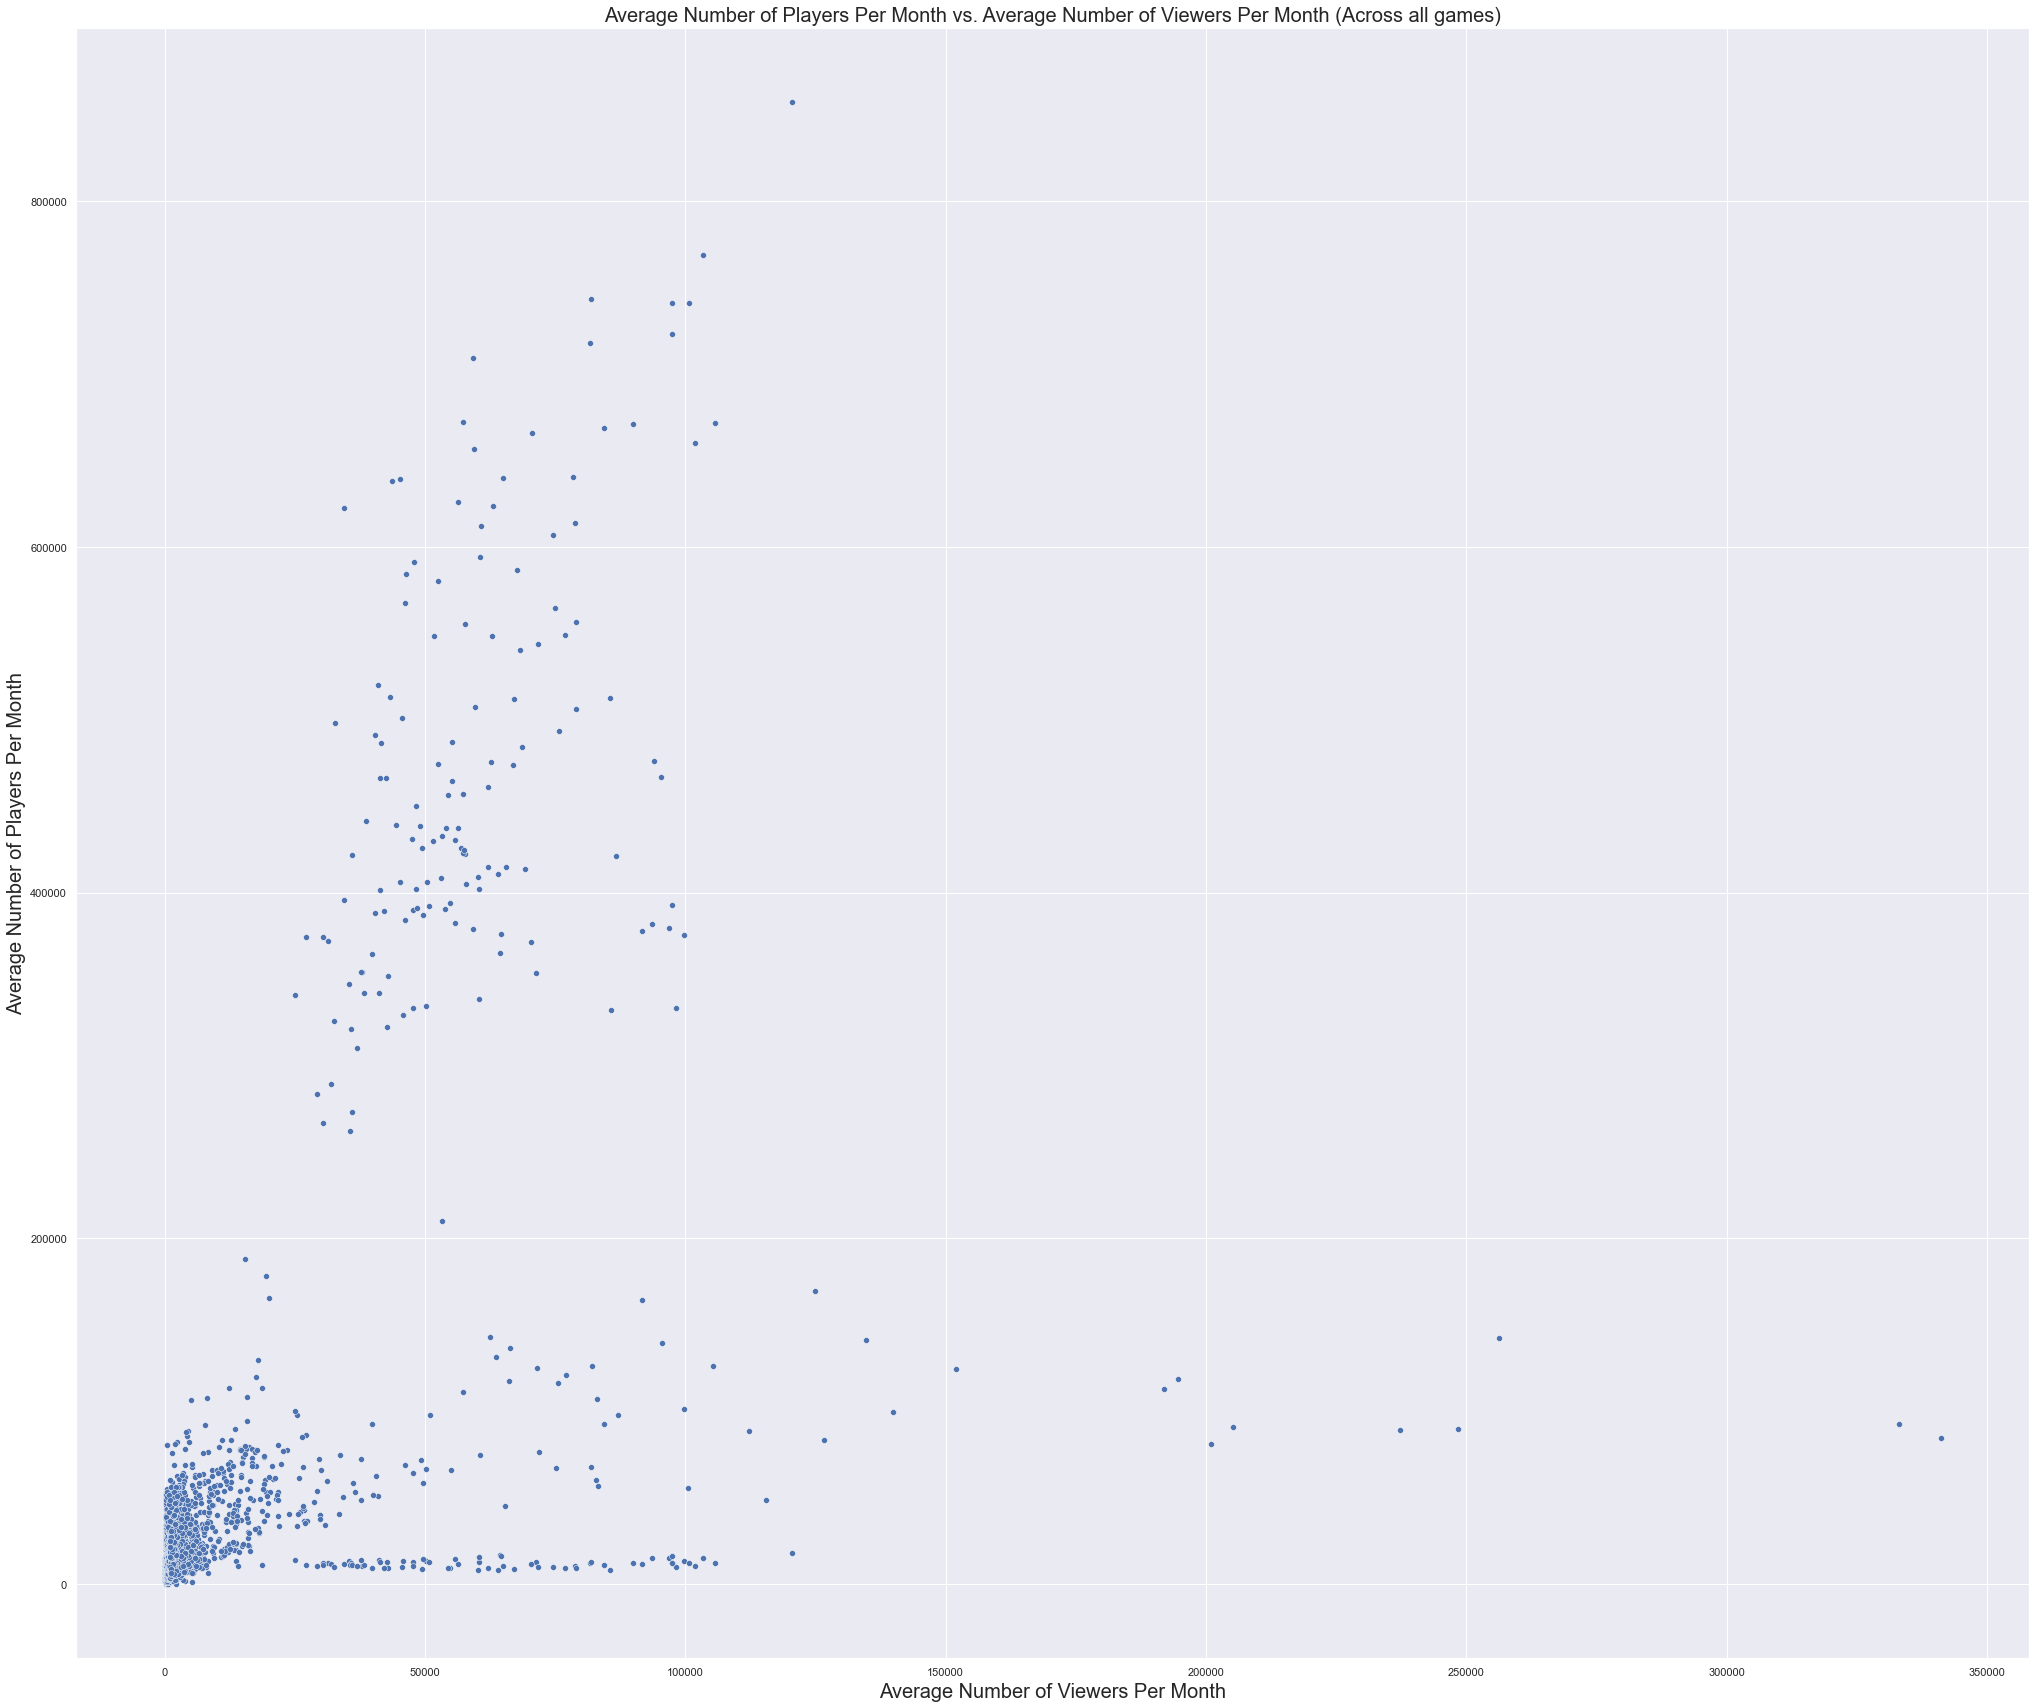

In [38]:
sns.scatterplot(x="Avg_viewers", y="Avg_players", data=viewers_and_players)
plt.title('Average Number of Players Per Month vs. Average Number of Viewers Per Month (Across all games)', size = 20)
plt.xlabel('Average Number of Viewers Per Month', size = 20)
plt.ylabel('Average Number of Players Per Month', size = 20)

Text(0.5, 0, 'Average Number of Players Per Month')

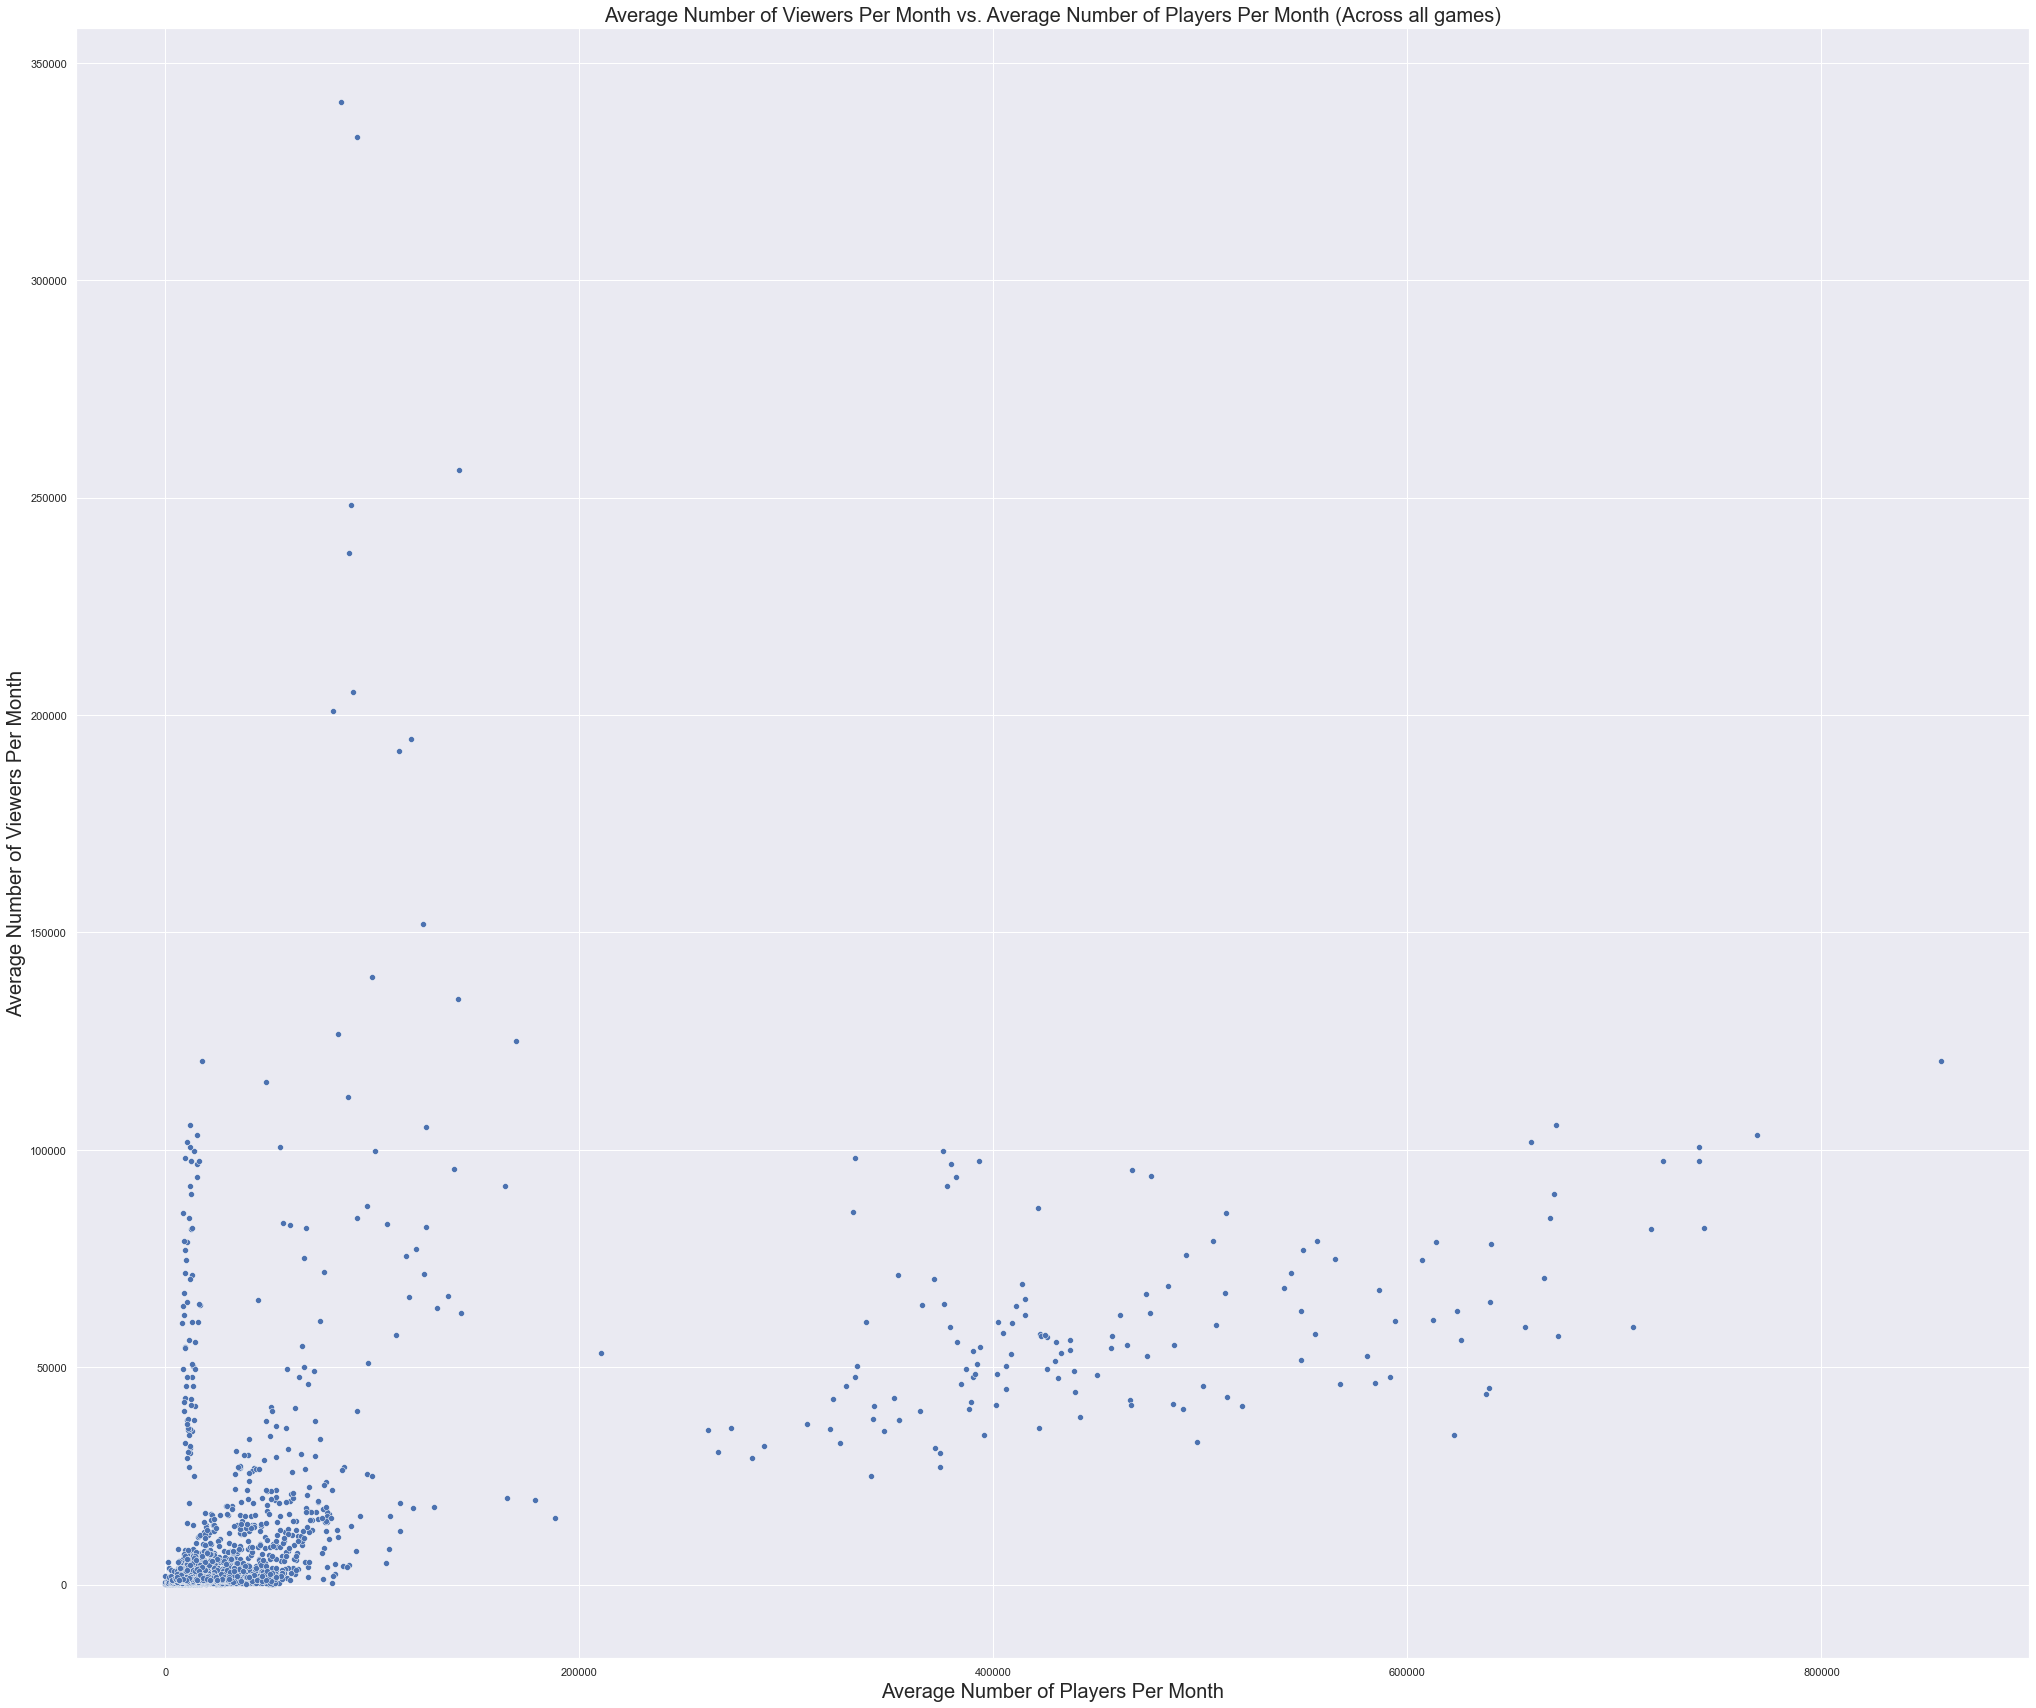

In [39]:
sns.scatterplot(y="Avg_viewers", x="Avg_players", data=viewers_and_players)
plt.title('Average Number of Viewers Per Month vs. Average Number of Players Per Month (Across all games)', size = 20)
plt.ylabel('Average Number of Viewers Per Month', size = 20)
plt.xlabel('Average Number of Players Per Month', size = 20)

From both scatterplots, we see a large cluster near the beginning which may indicate some weakness in the relationship. Then the next noticable features of the graphs is this relative straight line going towards the x-axis when **'Avg_viewers'** is the independent variable and towards the y-axis when **'Avg_players'** is the independent variable. We also seem to get two areas that looks as if we can place a best fit line through. 

C:\Users\DON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


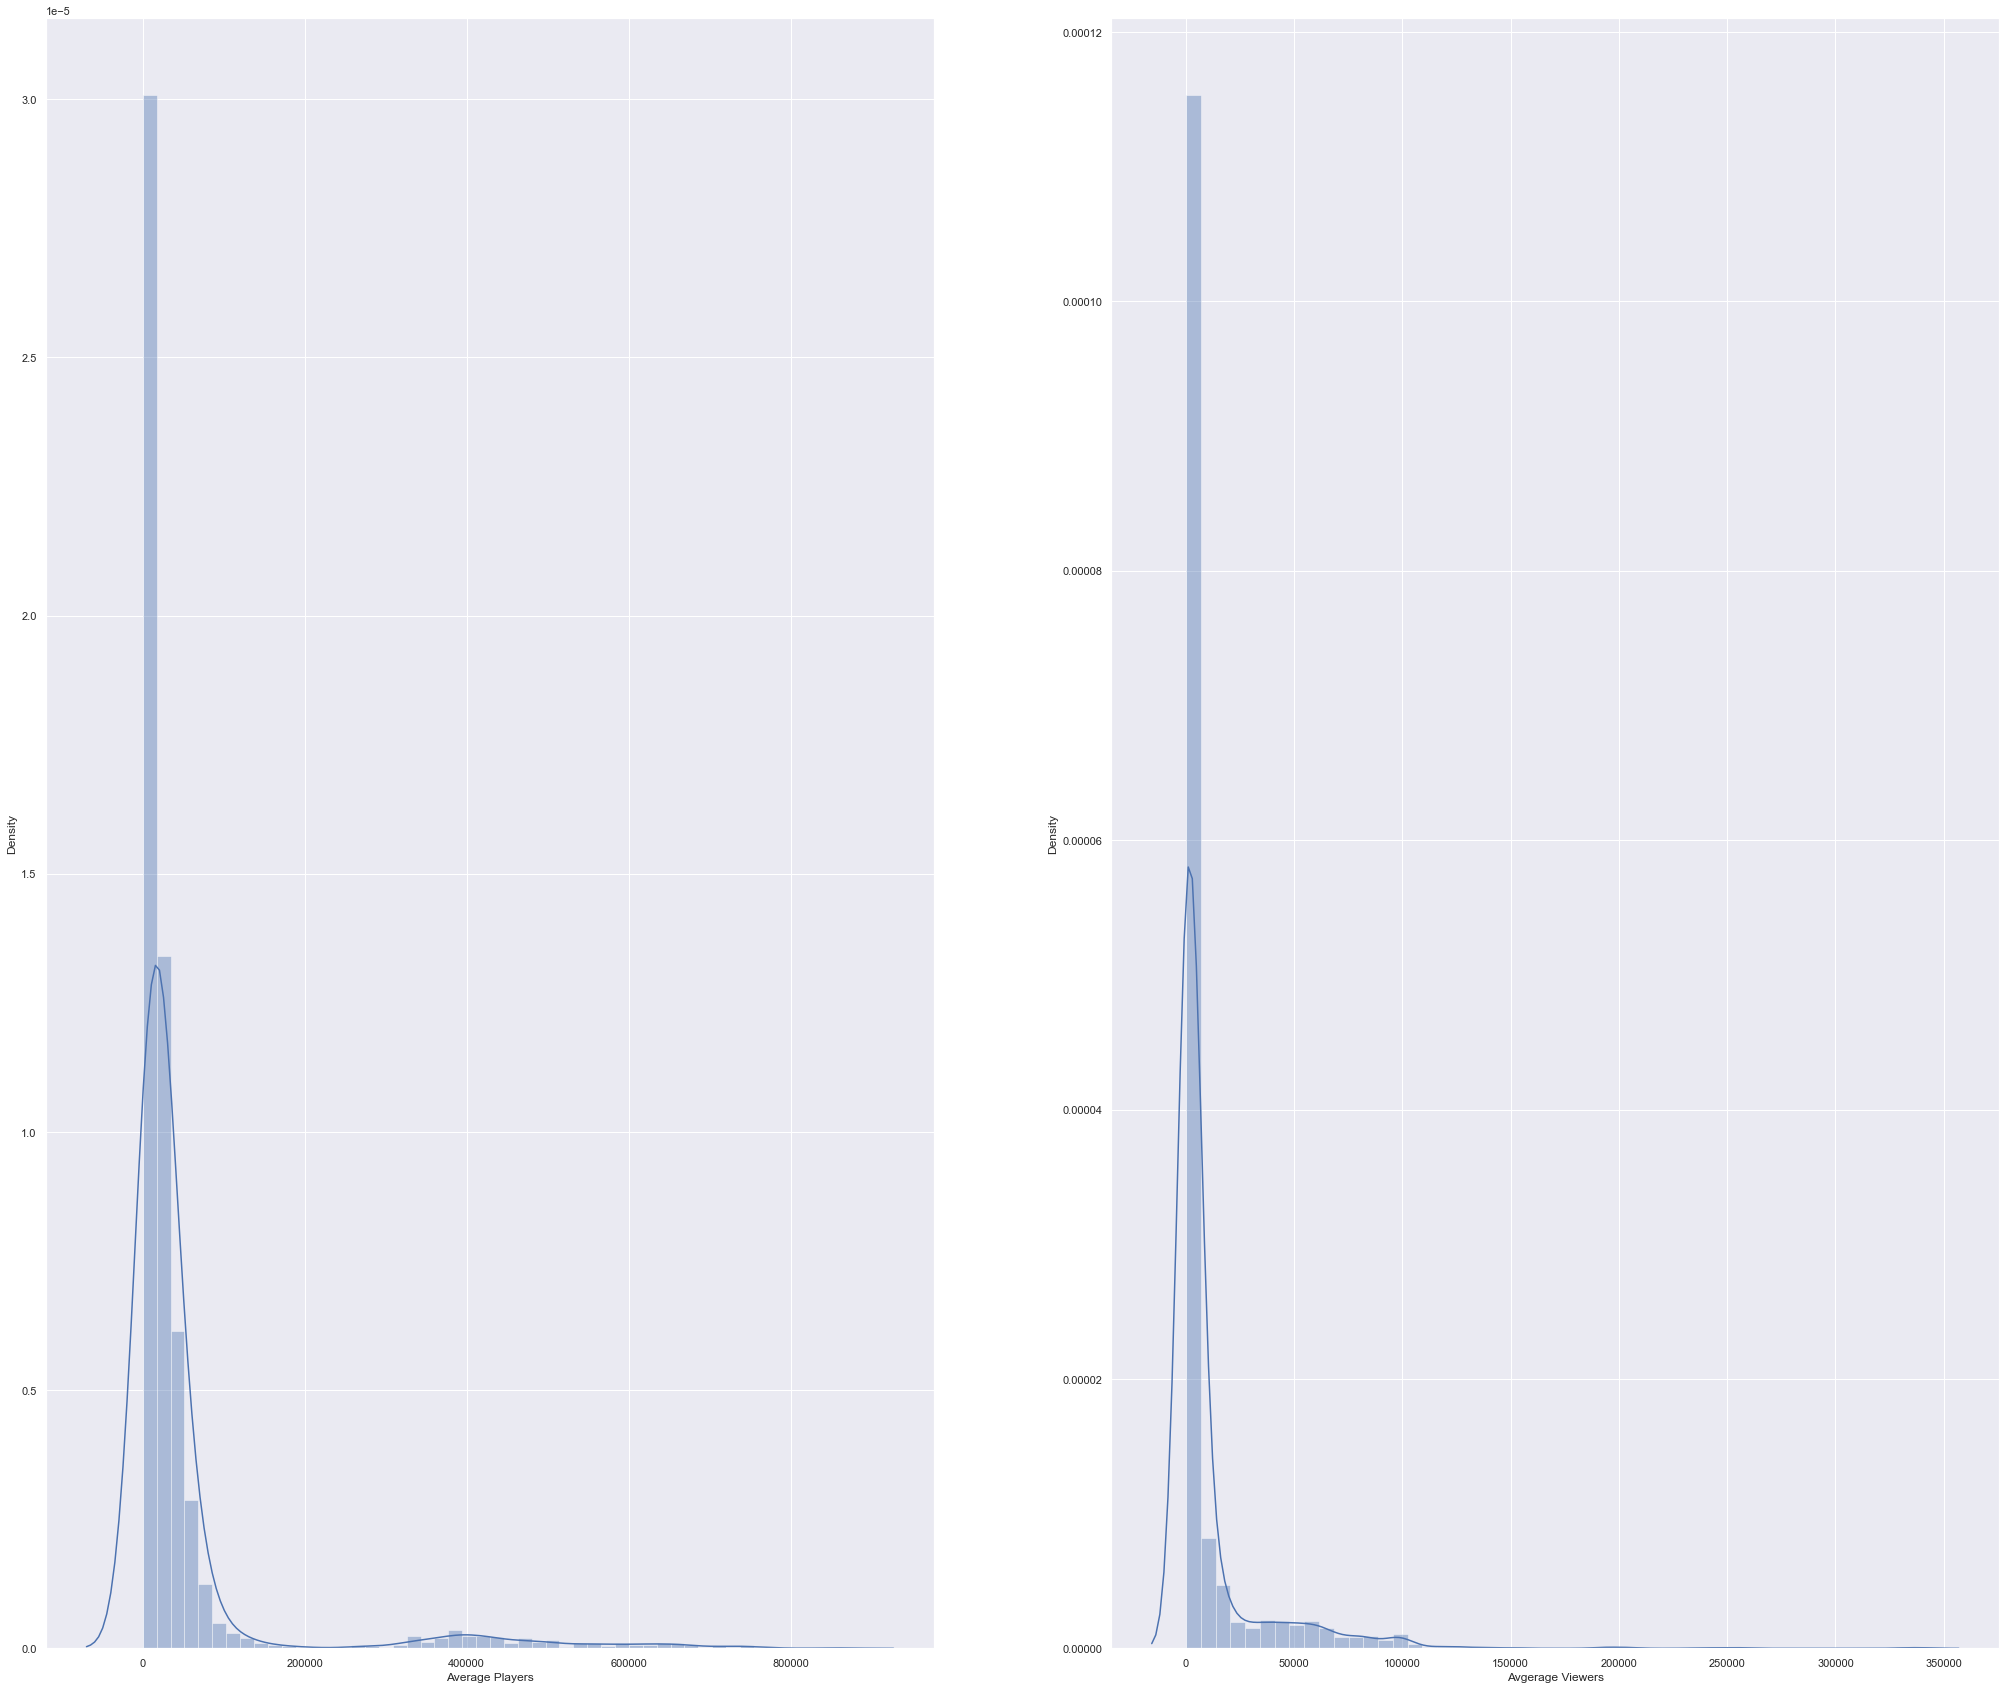

In [40]:
#from Ron Lai
plt.subplot(1, 2, 1)
sns.distplot(viewers_and_players['Avg_players'])
plt.xlabel('Average Players')

plt.subplot(1, 2, 2)
sns.distplot(viewers_and_players['Avg_viewers'])
plt.xlabel('Avgerage Viewers');

C:\Users\DON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg_players_log', ylabel='Density'>

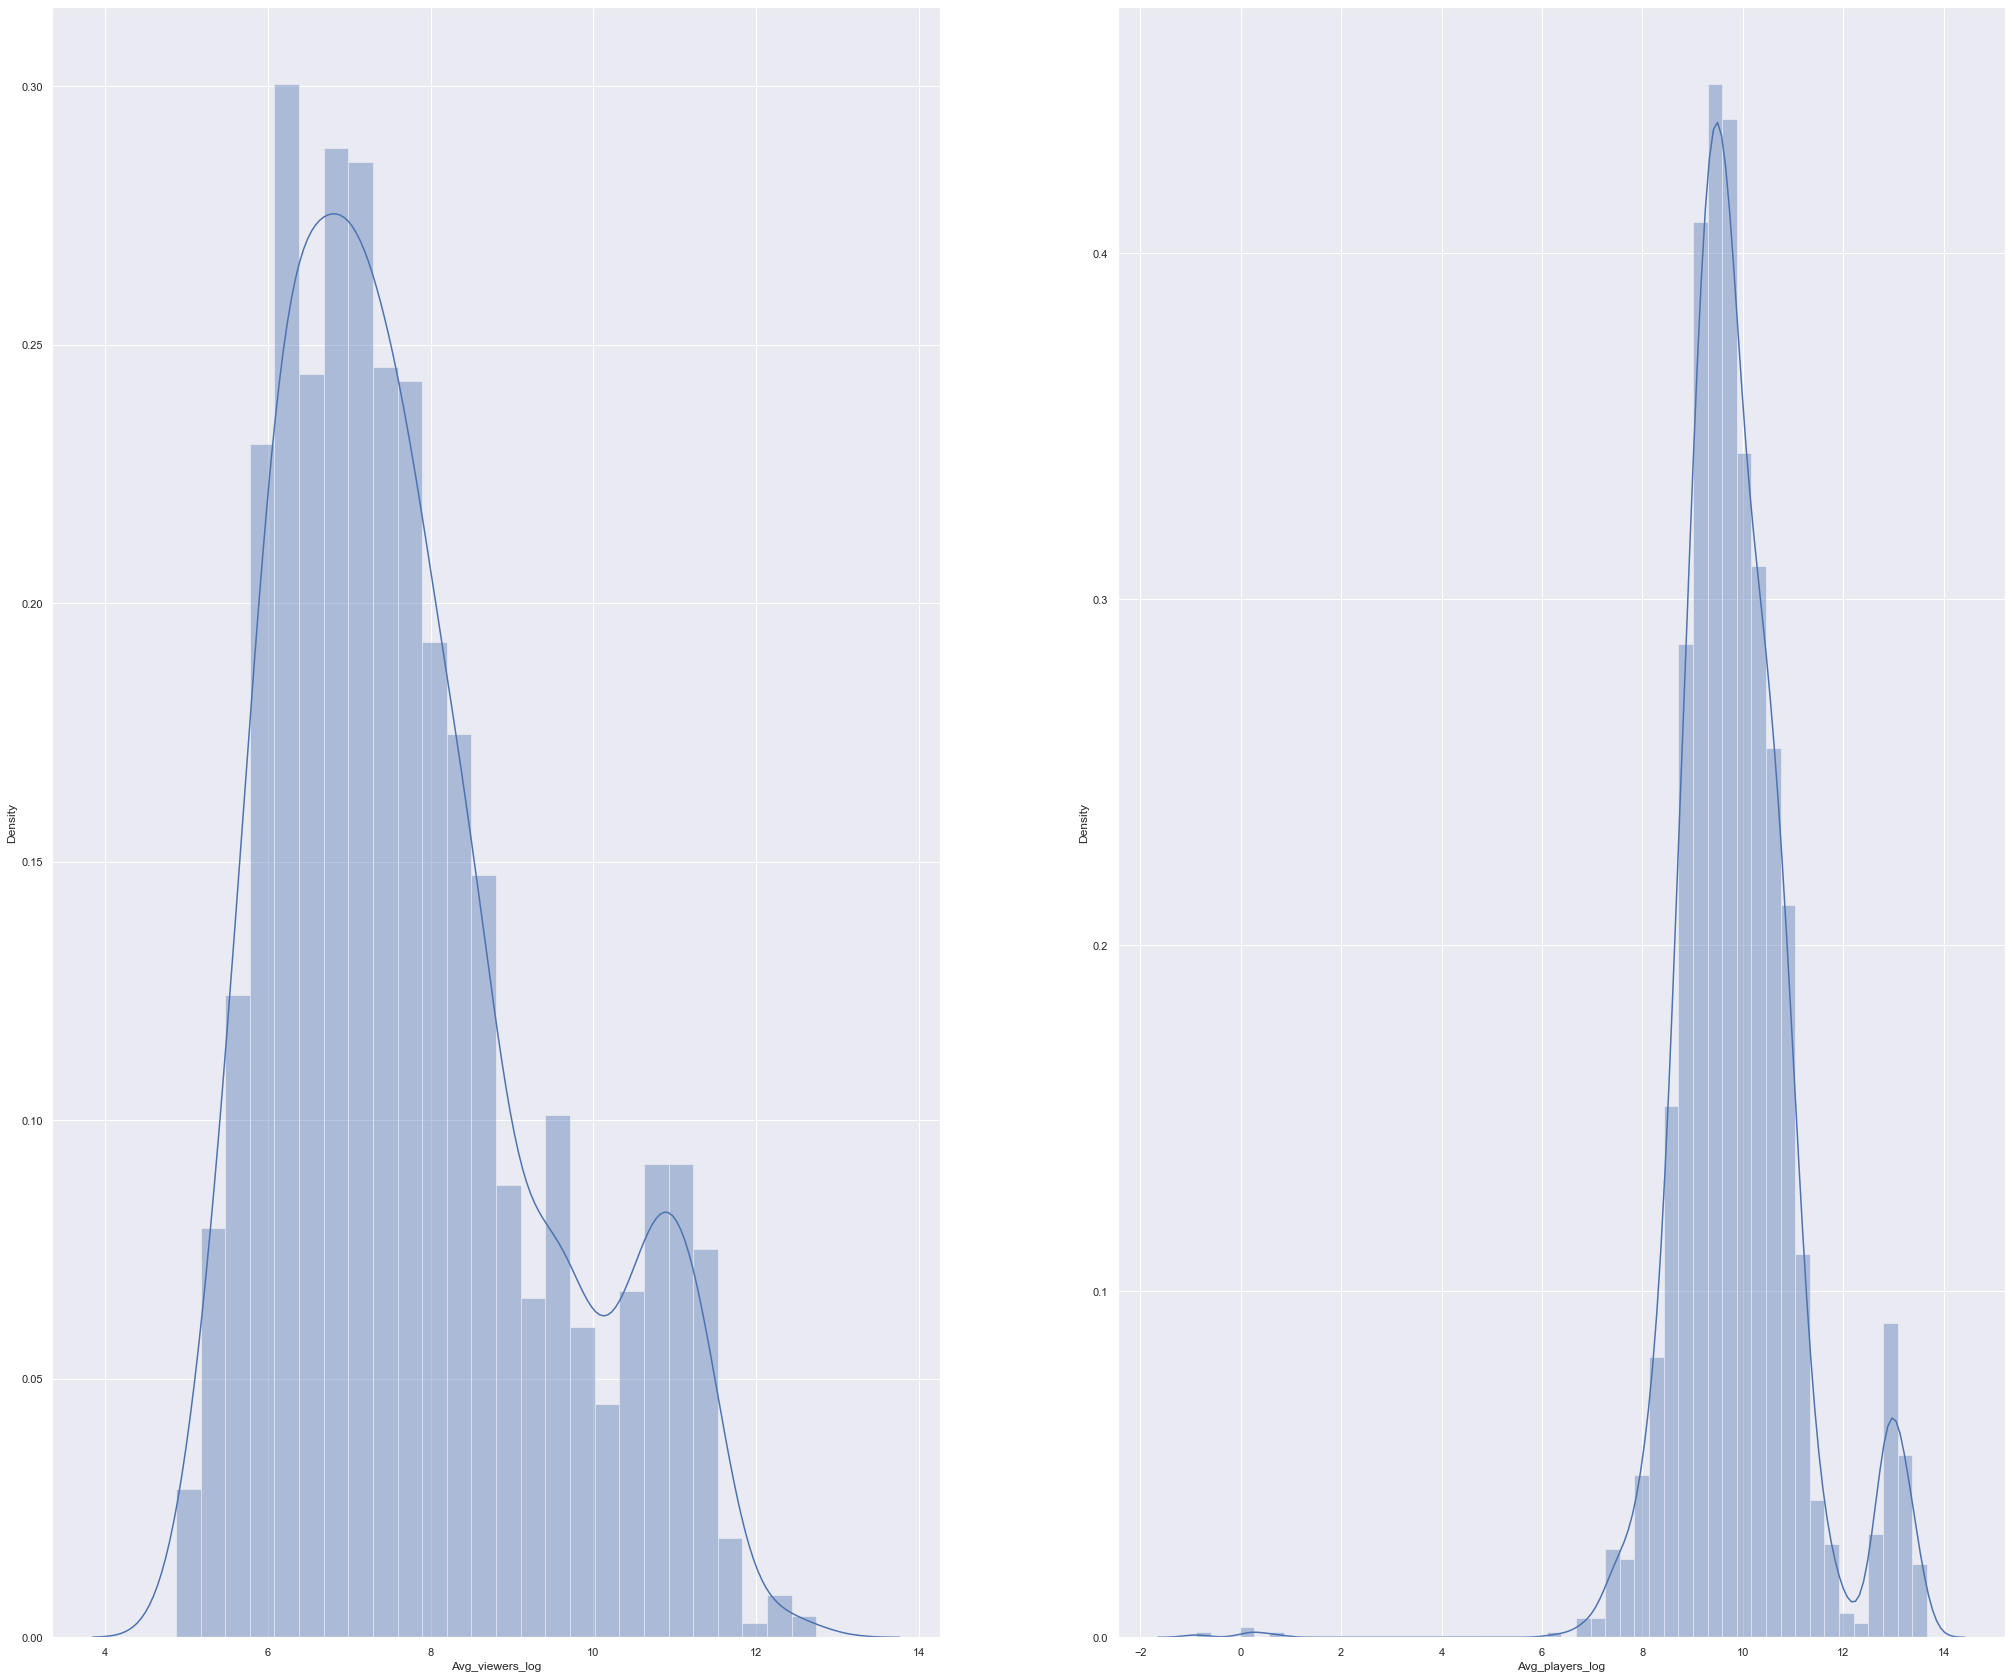

In [41]:
#from Ron Lai
viewers_and_players['Avg_viewers_log'] = np.log(viewers_and_players['Avg_viewers'])
viewers_and_players['Avg_players_log'] = np.log(viewers_and_players['Avg_players'])

plt.subplot(1, 2, 1)
sns.distplot(viewers_and_players['Avg_viewers_log'])
plt.subplot(1, 2, 2)
sns.distplot(viewers_and_players['Avg_players_log'])

Text(0, 0.5, 'Average Number of Players Per Month')

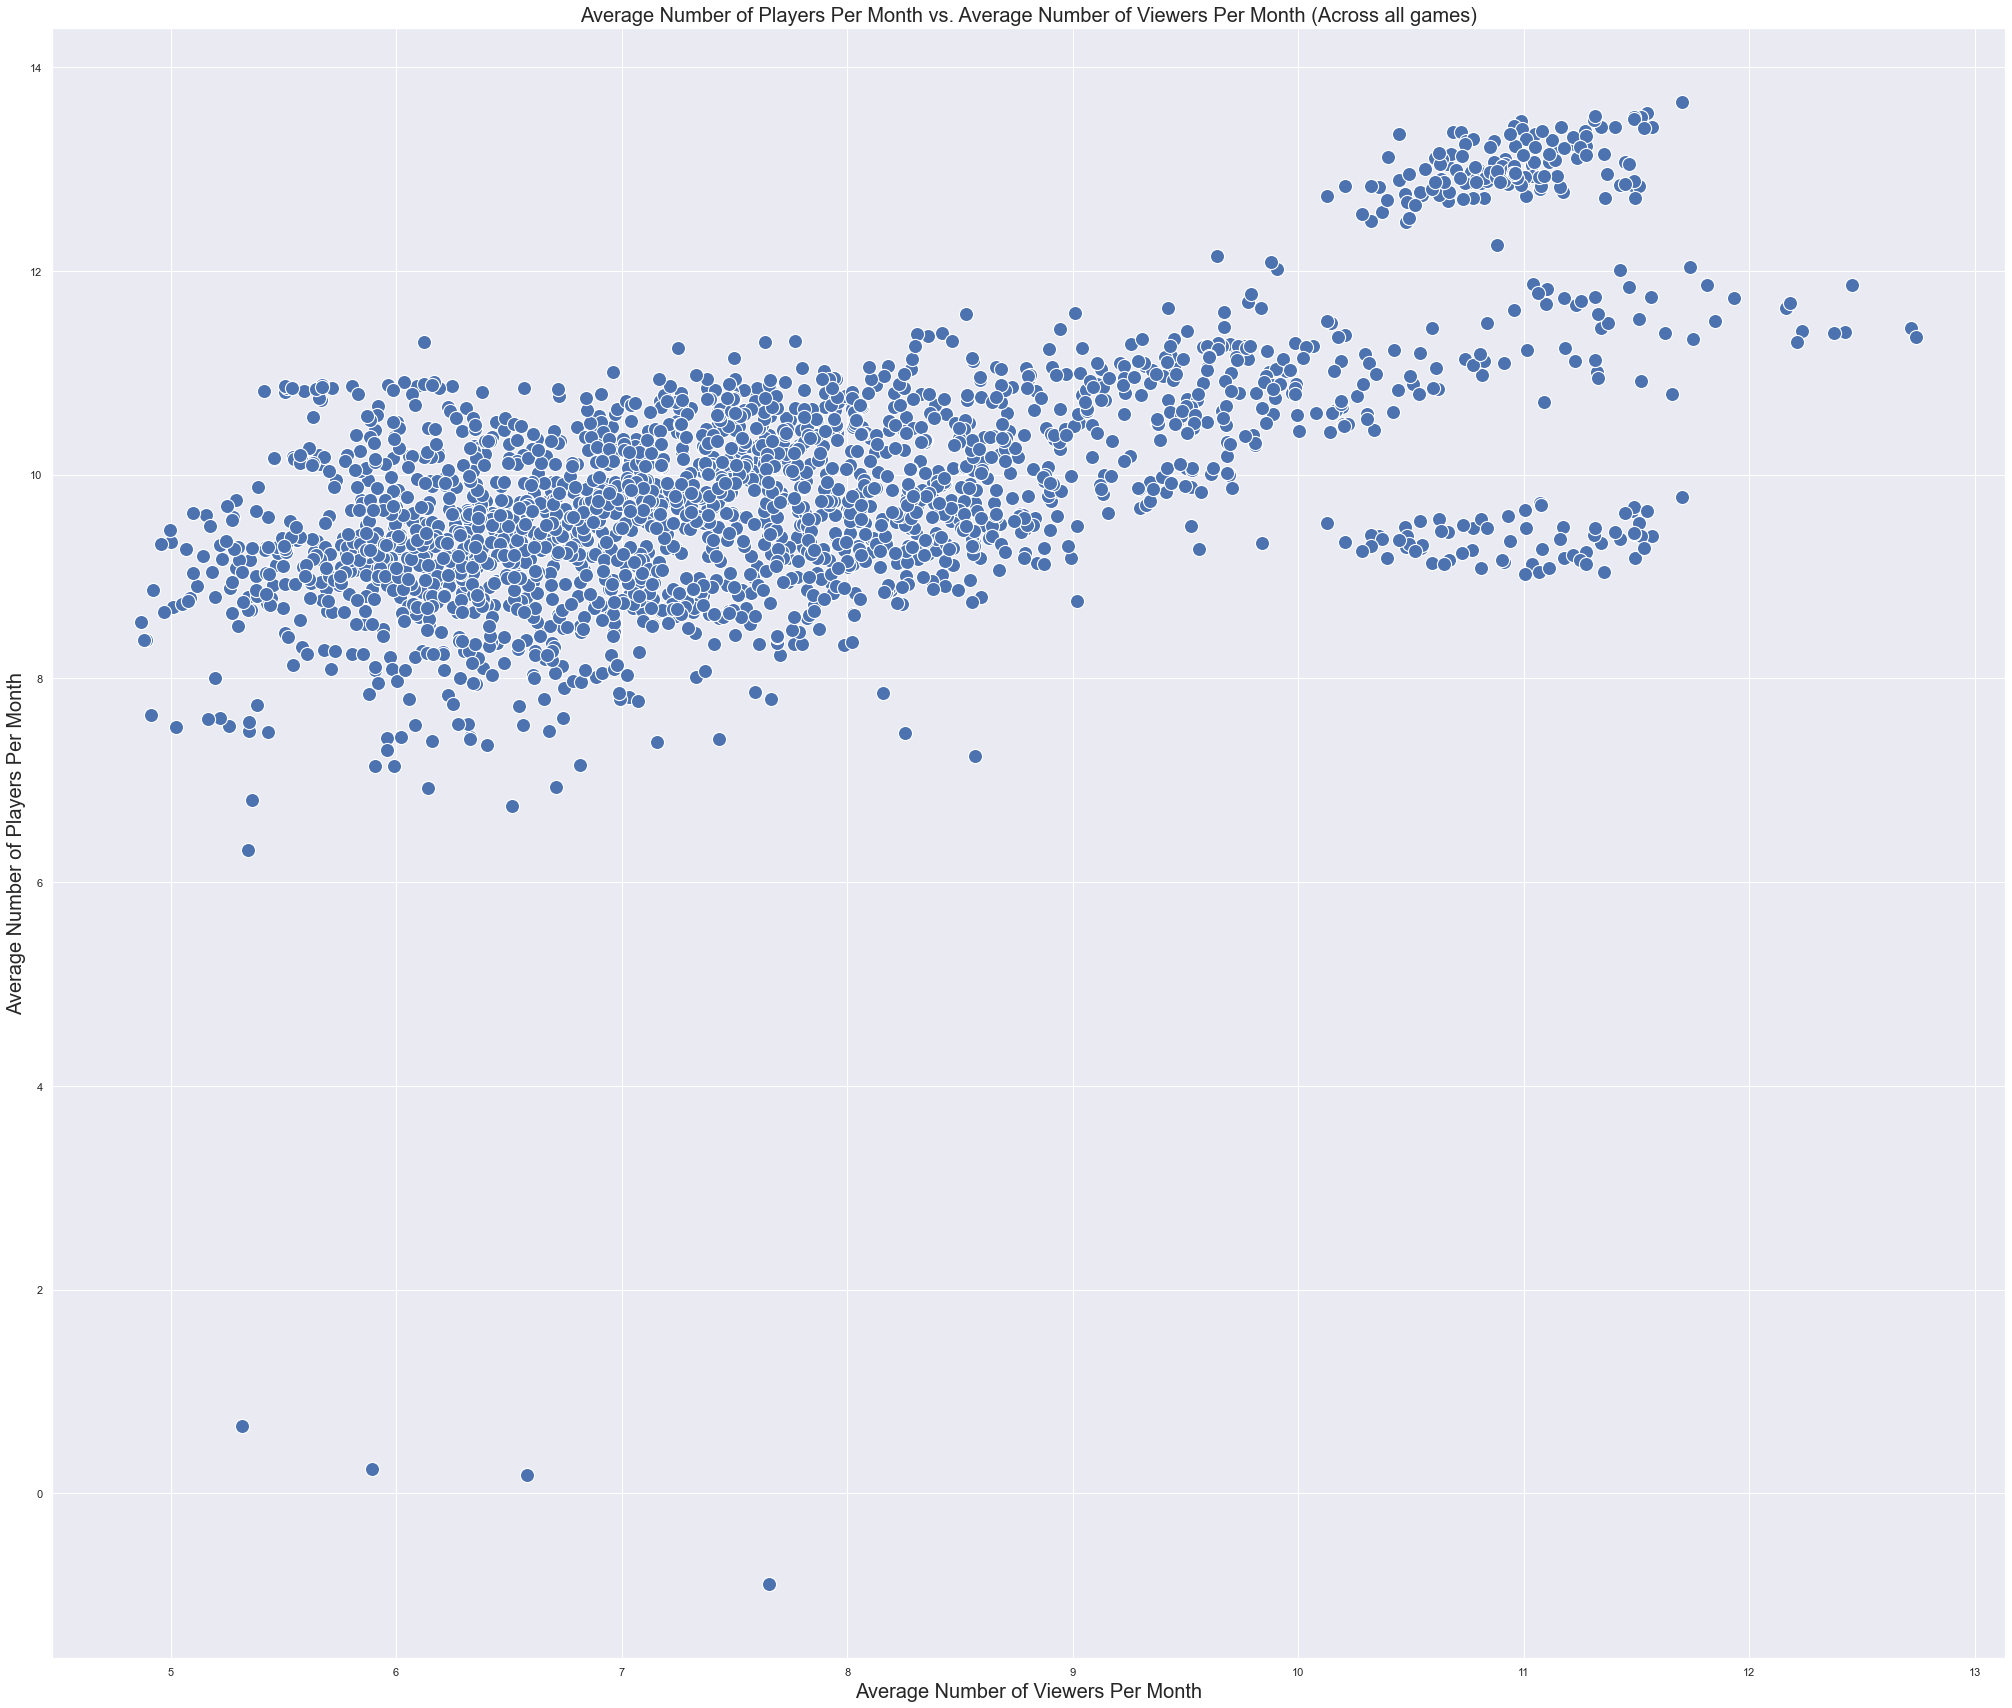

In [42]:
#from Ron Lai
sns.scatterplot(x="Avg_viewers_log", y="Avg_players_log", data=viewers_and_players, s =200)
plt.title('Average Number of Players Per Month vs. Average Number of Viewers Per Month (Across all games)', size = 20)
plt.xlabel('Average Number of Viewers Per Month', size = 20)
plt.ylabel('Average Number of Players Per Month', size = 20)

In [43]:
#from Ron Lai
viewers_and_players.sort_values(by=['Avg_players_log'])
viewers_and_players = viewers_and_players[viewers_and_players['Avg_players_log']>1]
viewers_and_players.sort_values(by=['Avg_players_log'])

,Year,Month,Hours_watched,Avg_viewer_ratio,Peak_viewers,Avg_viewers,Game,Month_Year,Avg_players,Peak_Players,Avg_viewers_log,Avg_players_log
241,2016,9,150832,93.05,8374,209,Divinity: Original Sin II,September 2016,550.36,2836,5.342334,6.310573
391,2017,2,452885,54.23,8985,674,Oxygen Not Included,February 2017,852.94,4020,6.513230,6.748689
305,2016,11,153774,15.74,16822,213,No Man's Sky,November 2016,900.28,8090,5.361292,6.802706
859,2018,4,334497,15.56,3931,465,Hunt: Showdown,April 2018,1011.76,2262,6.142037,6.919447
888,2018,5,609131,27.86,48180,819,Hunt: Showdown,May 2018,1027.21,2829,6.708084,6.934602
...,...,...,...,...,...,...,...,...,...,...,...,...
2147,2021,3,72375036,44.50,454393,97409,Counter-Strike: Global Offensive,March 2021,740927.82,1198581,11.486674,13.515658
2104,2021,2,67578481,44.84,607485,100713,Counter-Strike: Global Offensive,February 2021,741013.24,1123485,11.520030,13.515774
2059,2021,1,60899705,36.48,592921,81964,Counter-Strike: Global Offensive,January 2021,743209.66,1124553,11.314035,13.518733
1733,2020,5,76786808,43.05,380494,103346,Counter-Strike: Global Offensive,May 2020,768795.25,1193359,11.545838,13.552580


Text(0, 0.5, 'Average Number of Players Per Month')

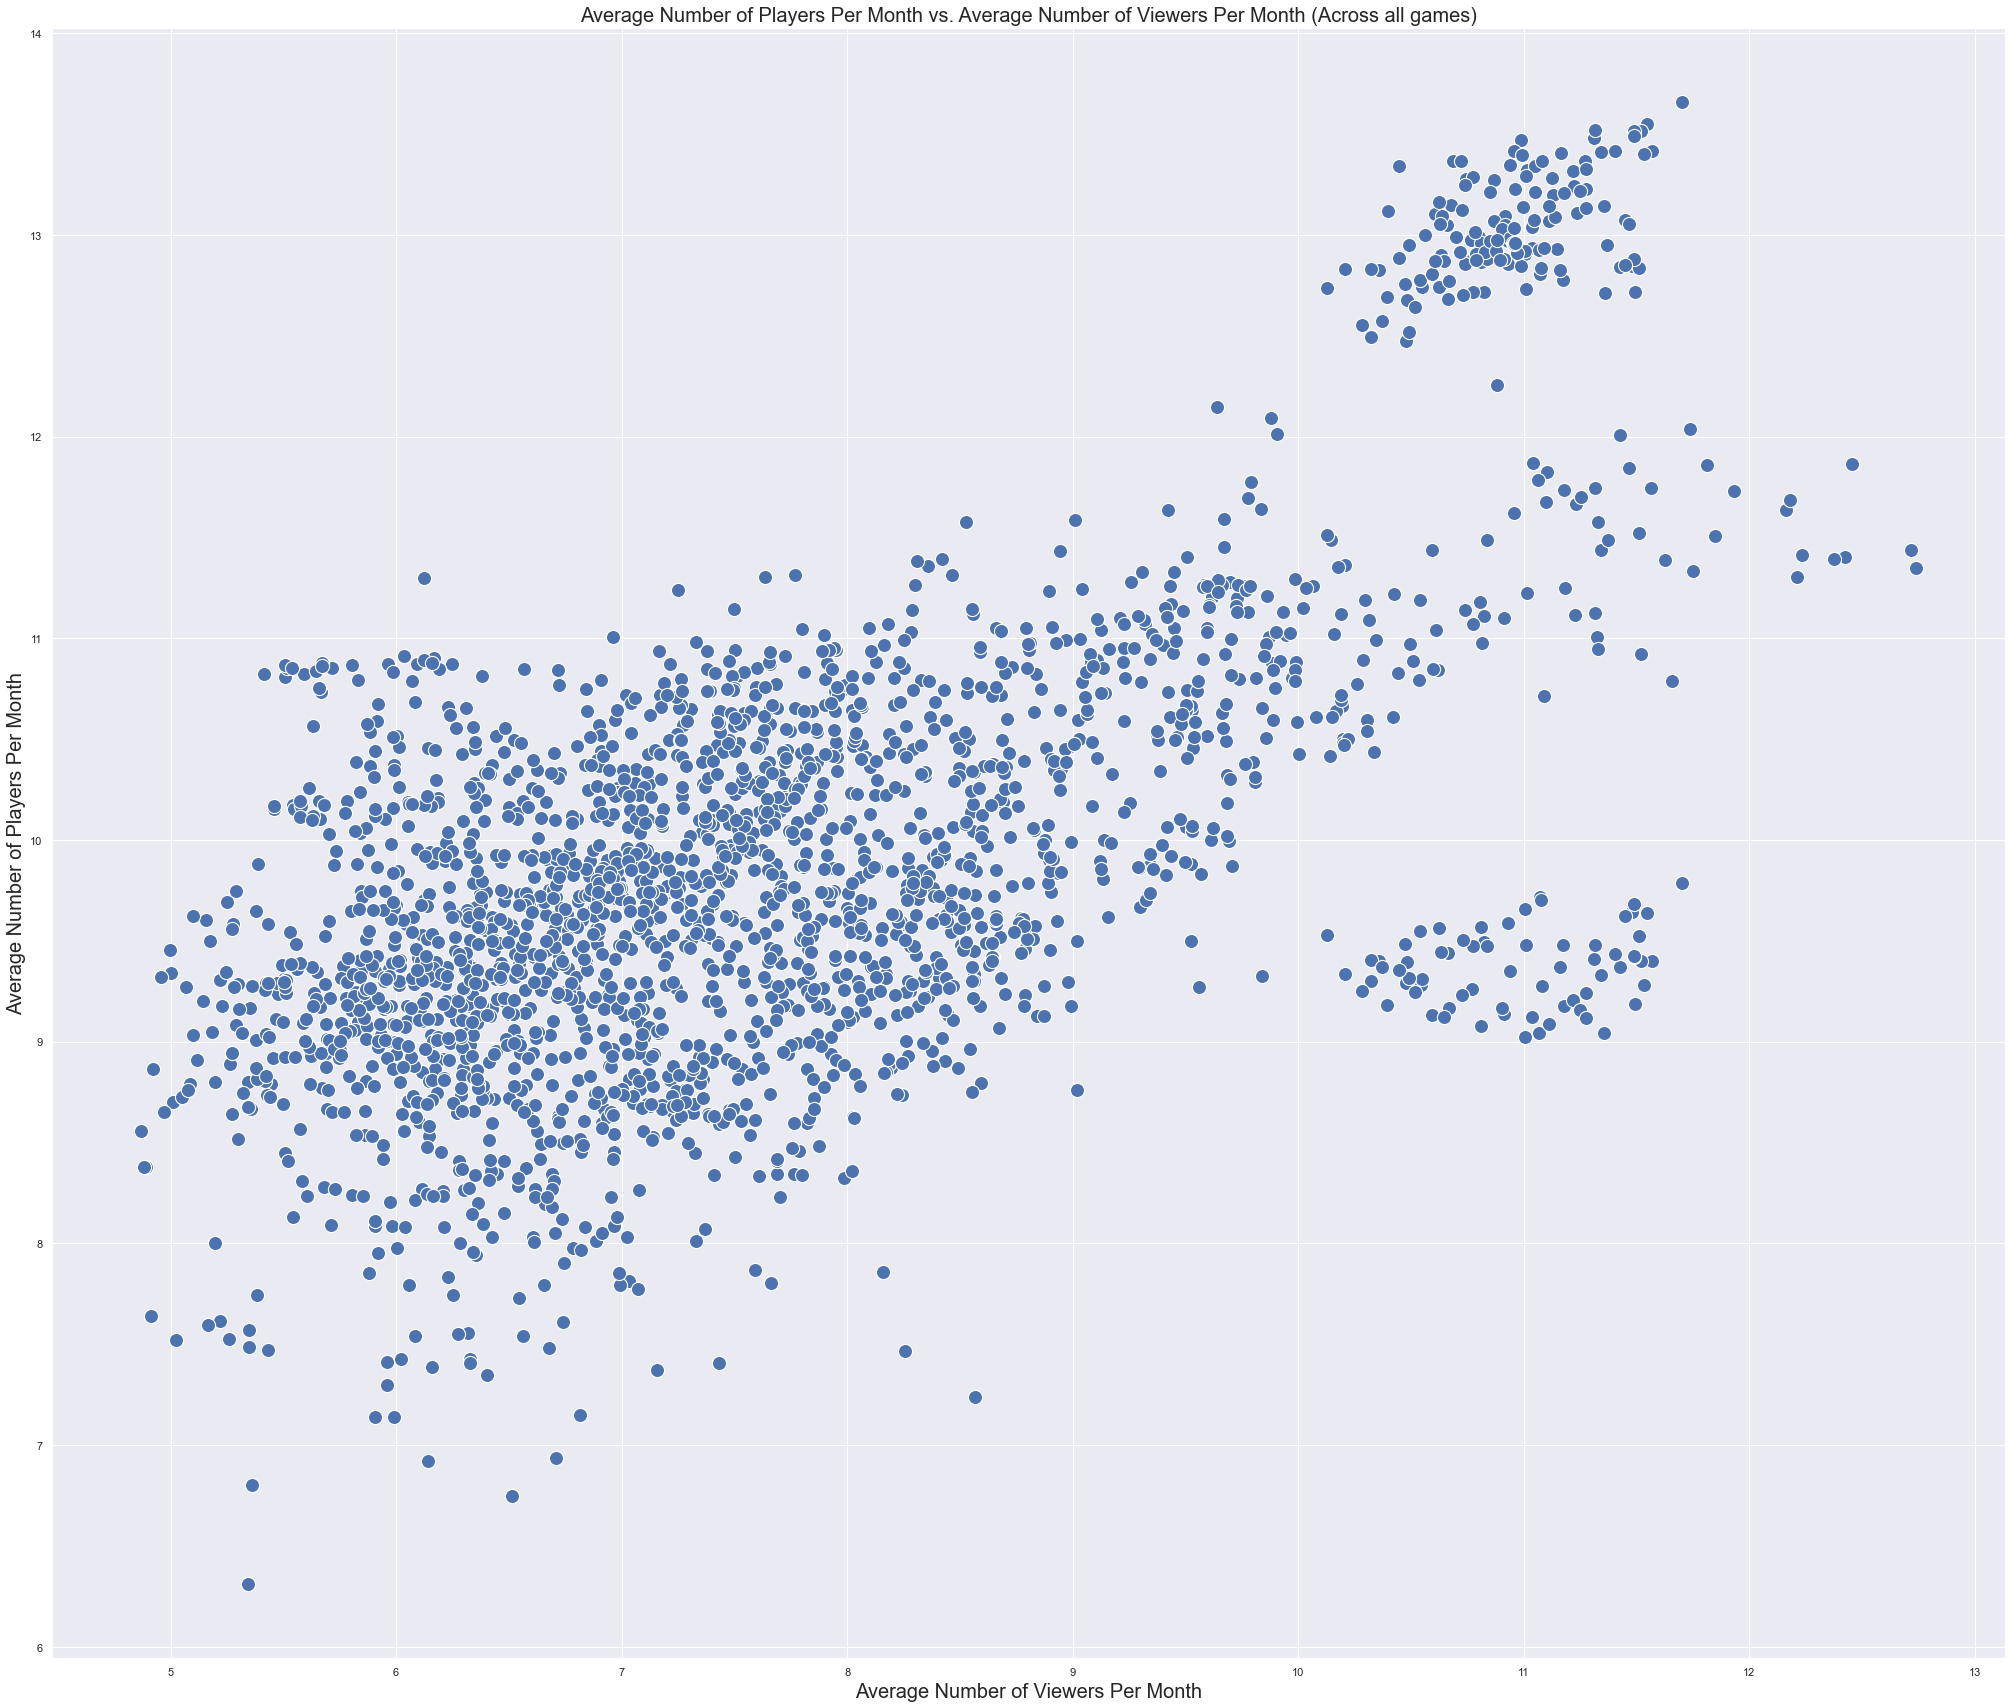

In [51]:
#from Ron Lai
sns.scatterplot(x="Avg_viewers_log", y="Avg_players_log", data=viewers_and_players, s =200)
plt.title('Average Number of Players Per Month vs. Average Number of Viewers Per Month (Across all games)', size = 20)
plt.xlabel('Average Number of Viewers Per Month', size = 20)
plt.ylabel('Average Number of Players Per Month', size = 20)

In [45]:
#from Ron Lai
import patsy
import statsmodels.api as sm
outcome, predictors = patsy.dmatrices('Avg_players_log~Avg_viewers_log', viewers_and_players)
model = sm.OLS(outcome, predictors)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Avg_players_log   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     1724.
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          9.54e-285
Time:                        19:40:43   Log-Likelihood:                -3079.9
No. Observations:                2415   AIC:                             6164.
Df Residuals:                    2413   BIC:                             6175.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.4161      0.086     

Text(0, 0.5, 'Average Number of Players Per Month')

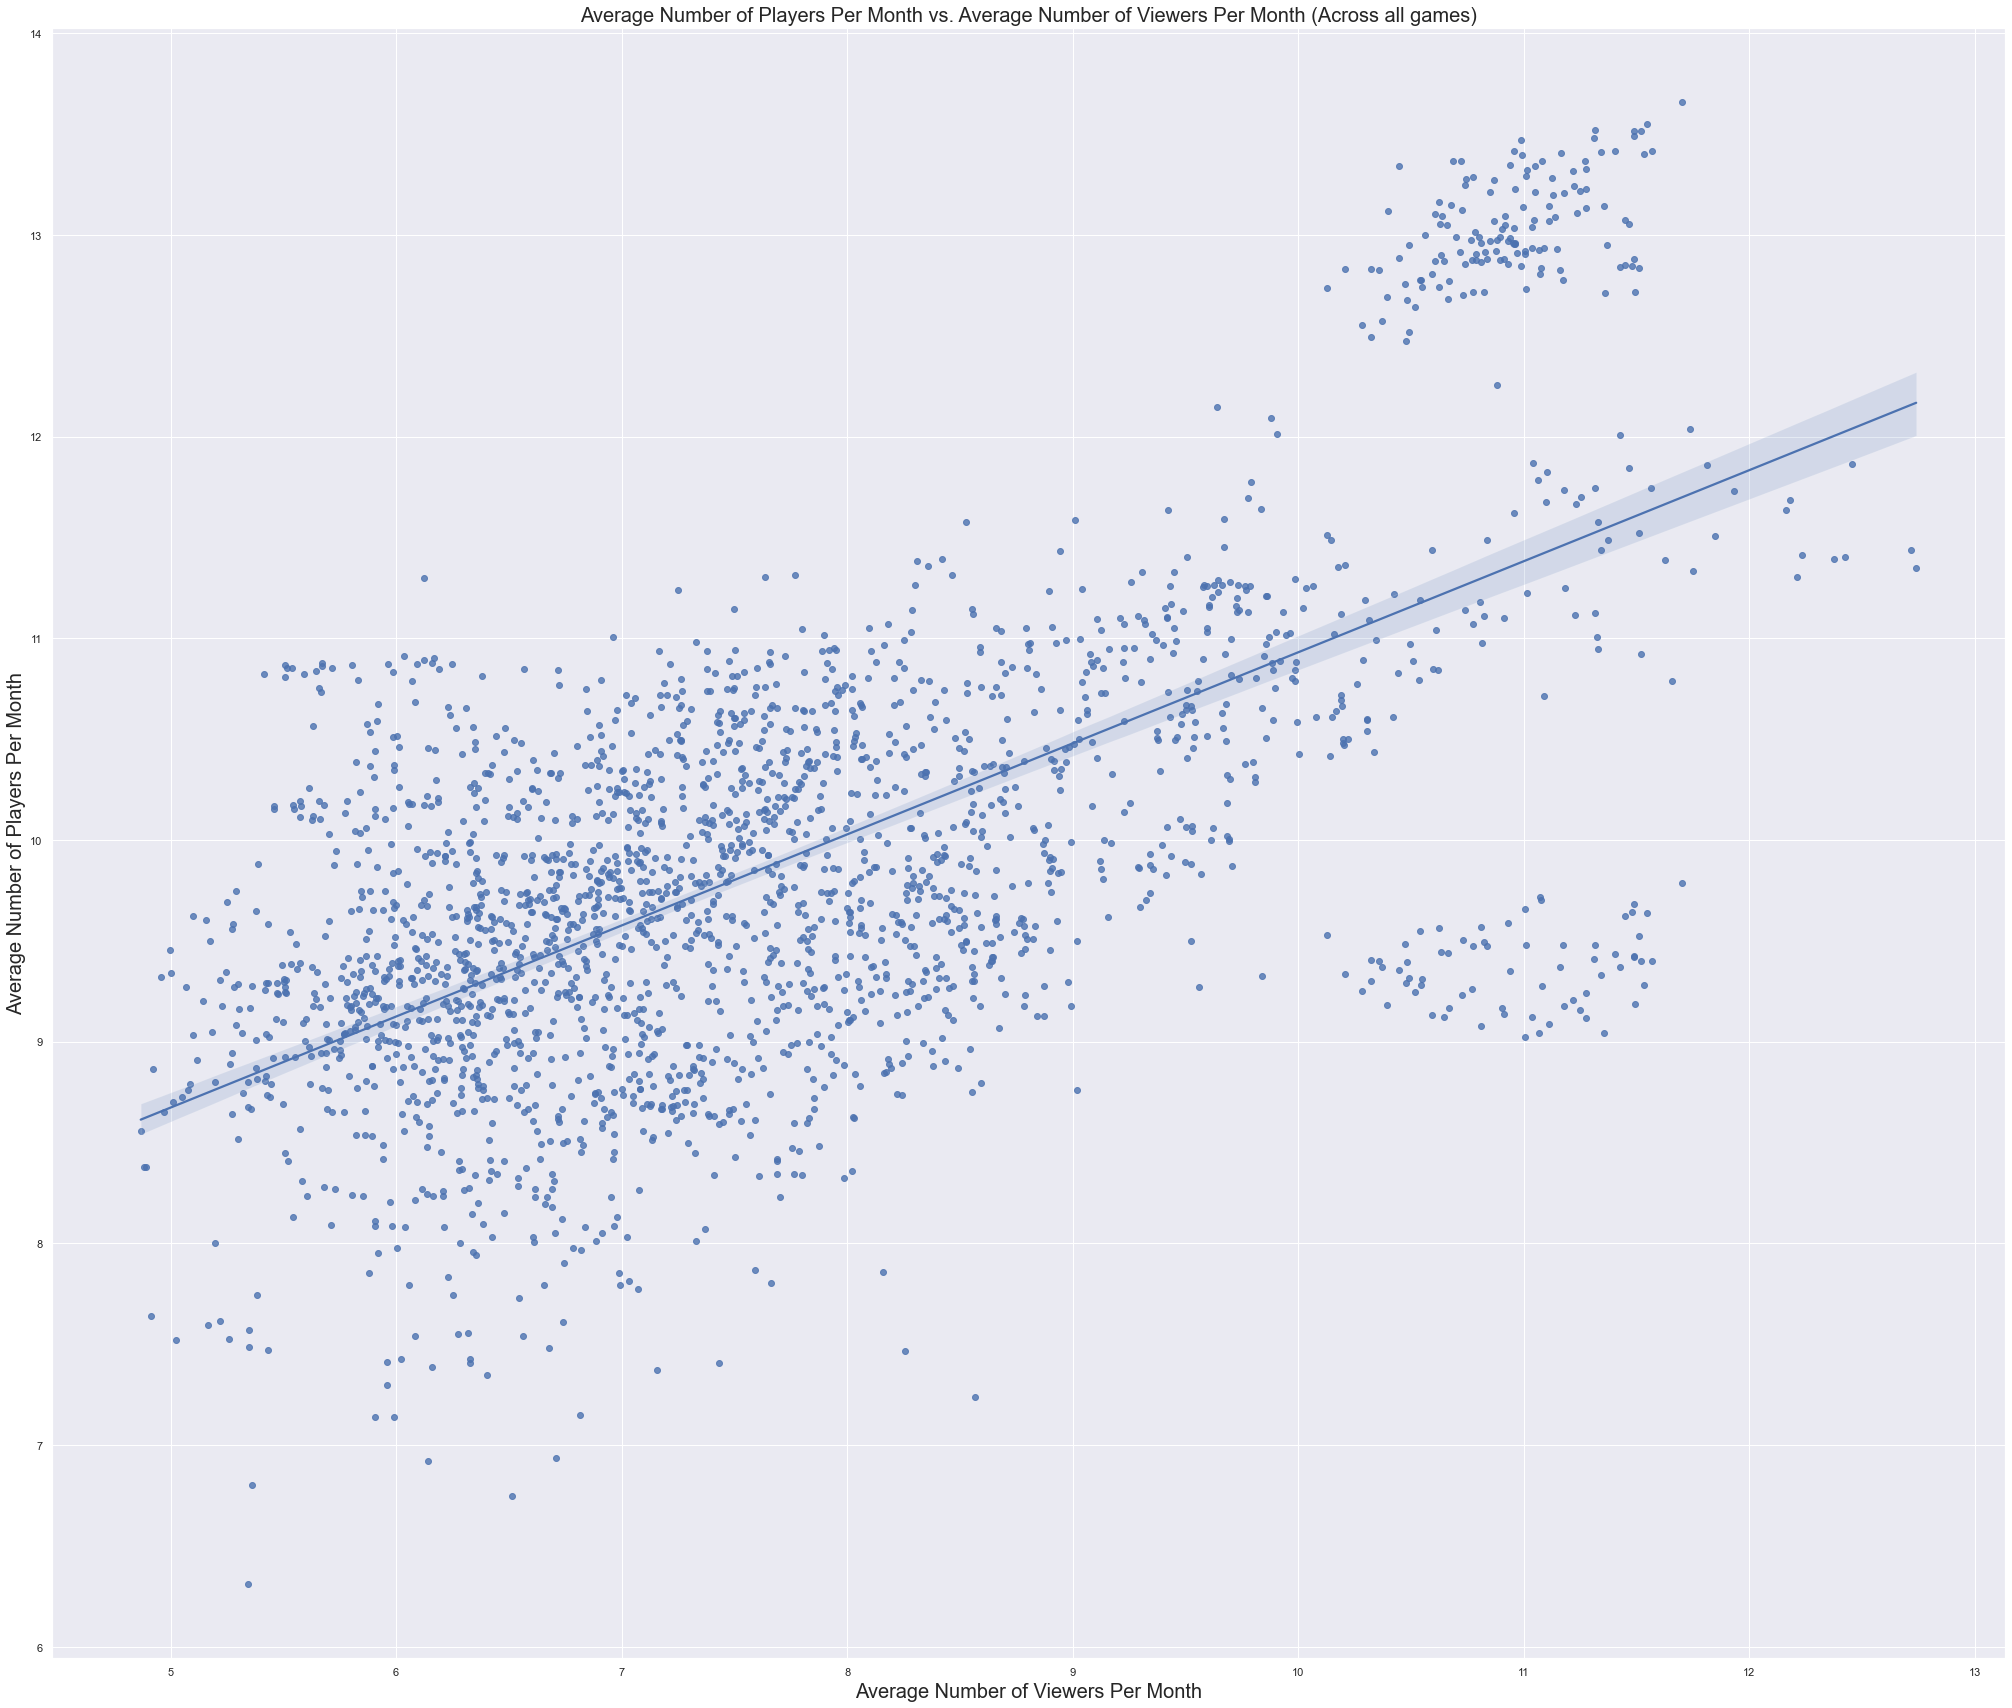

In [49]:
sns.regplot(x="Avg_viewers_log", y="Avg_players_log", data=viewers_and_players)
plt.title('Average Number of Players Per Month vs. Average Number of Viewers Per Month (Across all games)', size = 20)
plt.xlabel('Average Number of Viewers Per Month', size = 20)
plt.ylabel('Average Number of Players Per Month', size = 20)